# Result visualization of Multiple telescopes scheduling

In [421]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import MultipleLocator

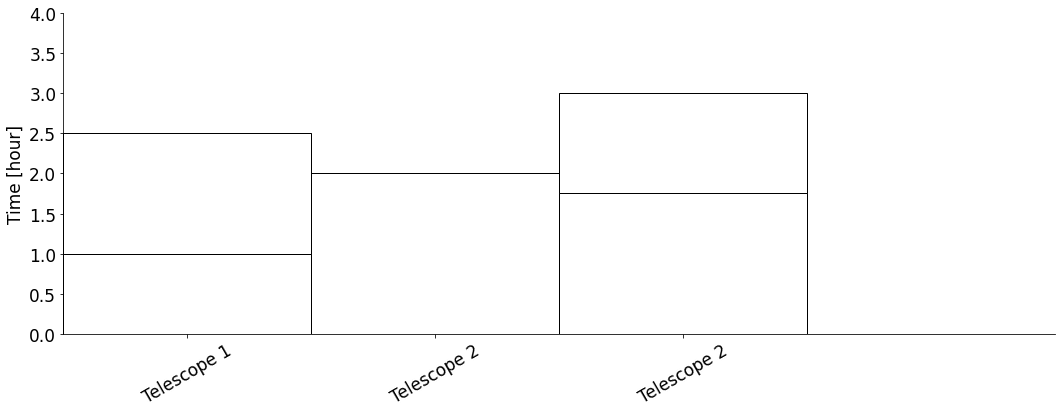

In [422]:
x_data = ['Telescope 1', 'Telescope 2', 'Telescope 2']
x_width = range(0,len(x_data))


y_1 = [1, 2, 1.75]
y_2 = [1.5, 0, 1.25]

fig, ax = plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.rcParams['figure.figsize'] = (7, 5)
plt.rcParams['font.size'] = 15

plt.bar(x_width,y_1,width=1,label="1",ec='black',ls='-', lw=1, color='white')
plt.bar(x_width,y_2,bottom=y_1,width=1,ec='black',ls='-', lw=1,label="2", color='white')

plt.xticks(range(len(x_data)),x_data,rotation=30)
plt.ylim(0,4)
plt.xlim(-0.5,3.5)
plt.ylabel("Time [hour]")
plt.tight_layout()
plt.savefig("timepoint.pdf")

In [423]:
def data_reader(file_dir, length):
    col_names = ['No', 'Duration', 'Slew time', 'Wait time', 'Obs time', 'Rel slew', 'Rel wait', 'Rel obs', 'Max attempts',
             'Times max att', 'Obs result 1', 'Obs result 2', 'Obs result 3', 'Obs result 4', 'Interruption 1', 'Interruption 2']
    data = pd.read_csv(file_dir, names=col_names)
    data = data.to_numpy()
    return data[length,:]

## Dataset 1

In [424]:
dataset = 'dataset1'

### The number of telescopes analysis

In [425]:
policy = 'tsp'
tsp_mean = np.zeros([8, 16])
tsp_err = np.zeros([2, 8])


file_dir = 'results/'+dataset+'/'+ 'tsp1' + '/' + 'batch_2017_3_21_13_0_0_.csv'
tsp_mean[0,:] = np.mean(data_reader(file_dir,range(5,15)).astype(np.float), axis=0)
tsp_err[0,0] = max(data_reader(file_dir,range(5,15)).astype(np.float)[:,1])-tsp_mean[0,1]
tsp_err[1,0] = tsp_mean[0,1]-min(data_reader(file_dir,range(5,15)).astype(np.float)[:,1])
for j in range(2,9):
    tsp_data = np.zeros([10, j, 16])
    for i in range(10):
        file_dir = 'results/'+dataset+'/'+ policy + str(j) + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
        tsp_data[i,:,:] = data_reader(file_dir,range(5,5+j))
    tsp_mean[j-1,:] = np.mean(np.mean(tsp_data, axis=0), axis=0)
    tsp_err[0,j-1] = max(np.mean(tsp_data, axis=1)[:,1])-tsp_mean[j-1,1]
    tsp_err[1,j-1] = tsp_mean[j-1,1]-min(np.mean(tsp_data, axis=1)[:,1])

In [426]:
policy = 'tspInt'
tspInt_mean = np.zeros([8, 16])
tspInt_err = np.zeros([2, 8])

file_dir = 'results/'+dataset+'/'+ 'tspInt1' + '/' + 'batch_2017_3_21_13_0_0_.csv'
tspInt_mean[0,:] = np.mean(data_reader(file_dir,range(5,15)).astype(np.float), axis=0)
tspInt_err[0,0] = max(data_reader(file_dir,range(5,15)).astype(np.float)[:,1])-tspInt_mean[0,1]
tspInt_err[1,0] = tspInt_mean[0,1]-min(data_reader(file_dir,range(5,15)).astype(np.float)[:,1])
for j in range(2,9):
    tspInt_data = np.zeros([10, j, 16])
    for i in range(10):
        file_dir = 'results/'+dataset+'/'+ policy + str(j) + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
        tspInt_data[i,:,:] = data_reader(file_dir,range(5,5+j))
    tspInt_mean[j-1,:] = np.mean(np.mean(tspInt_data, axis=0), axis=0)
    tspInt_err[0,j-1] = max(np.mean(tspInt_data, axis=1)[:,1])-tspInt_mean[j-1,1]
    tspInt_err[1,j-1] = tspInt_mean[j-1,1]-min(np.mean(tspInt_data, axis=1)[:,1])

In [427]:
policy = 'Random'
rand_mean = np.zeros([8, 16])
rand_err = np.zeros([2, 8])

file_dir = 'results/'+dataset+'/'+ 'Random1tele' + '/' + 'batch_2017_3_21_13_0_0_.csv'
rand_mean[0,:] = np.mean(data_reader(file_dir,range(5,15)).astype(np.float), axis=0)
rand_err[0,0] = max(data_reader(file_dir,range(5,15)).astype(np.float)[:,1])-rand_mean[0,1]
rand_err[1,0] = rand_mean[0,1]-min(data_reader(file_dir,range(5,15)).astype(np.float)[:,1])
for j in range(2,9):
    rand_data = np.zeros([10, j, 16])
    for i in range(10):
        file_dir = 'results/'+dataset+'/'+ policy + str(j) + 'tele' + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
        rand_data[i,:,:] = data_reader(file_dir,range(5,5+j))
    rand_mean[j-1,:] = np.mean(np.mean(rand_data, axis=0), axis=0)
    rand_err[0,j-1] = max(np.mean(rand_data, axis=1)[:,1])-rand_mean[j-1,1]
    rand_err[1,j-1] = rand_mean[j-1,1]-min(np.mean(rand_data, axis=1)[:,1])

In [428]:
policy = 'ShortestSlew'
shortall_mean = np.zeros([8, 16])
shortall_err = np.zeros([2, 8])

file_dir = 'results/'+dataset+'/'+ 'ShortestSlew1tele' + '/' + 'batch_2017_3_21_13_0_0_.csv'
shortall_mean[0,:] = np.mean(data_reader(file_dir,range(5,15)).astype(np.float), axis=0)
shortall_err[0,0] = max(data_reader(file_dir,range(5,15)).astype(np.float)[:,1])-shortall_mean[0,1]
shortall_err[1,0] = shortall_mean[0,1]-min(data_reader(file_dir,range(5,15)).astype(np.float)[:,1])
for j in range(2,9):
    shortall_data = np.zeros([10, j, 16])
    for i in range(10):
        file_dir = 'results/'+dataset+'/'+ policy + str(j) + 'tele' + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
        shortall_data[i,:,:] = data_reader(file_dir,range(5,5+j))
    shortall_mean[j-1,:] = np.mean(np.mean(shortall_data, axis=0), axis=0)
    shortall_err[0,j-1] = max(np.mean(shortall_data, axis=1)[:,1])-shortall_mean[j-1,1]
    shortall_err[1,j-1] = shortall_mean[j-1,1]-min(np.mean(shortall_data, axis=1)[:,1])

In [429]:
policy = 'ShortestSlew30neig'
short_mean = np.zeros([8, 16])
short_err = np.zeros([2, 8])

file_dir = 'results/'+dataset+'/'+ 'ShortestSlew30neig1' + '/' + 'batch_2017_3_21_13_0_0_.csv'
short_mean[0,:] = np.mean(data_reader(file_dir,range(5,15)).astype(np.float), axis=0)
short_err[0,0] = max(data_reader(file_dir,range(5,15)).astype(np.float)[:,1])-short_mean[0,1]
short_err[1,0] = short_mean[0,1]-min(data_reader(file_dir,range(5,15)).astype(np.float)[:,1])
for j in range(2,9):
    short_data = np.zeros([10, j, 16])
    for i in range(10):
        file_dir = 'results/'+dataset+'/'+ policy + str(j) + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
        short_data[i,:,:] = data_reader(file_dir,range(5,5+j))
    short_mean[j-1,:] = np.mean(np.mean(short_data, axis=0), axis=0)
    short_err[0,j-1] = max(np.mean(short_data, axis=1)[:,1])-short_mean[j-1,1]
    short_err[1,j-1] = short_mean[j-1,1]-min(np.mean(short_data, axis=1)[:,1])

In [430]:
#policy = 'tspInt'
early_mean = np.zeros([8, 16])
early_err = np.zeros([2, 8])

file_dir = 'results/'+dataset+'/'+ 'EarliestSetting1tele' + '/' + 'batch_2017_3_21_13_0_0_.csv'
early_mean[0,:] = np.mean(data_reader(file_dir,range(5,15)).astype(np.float), axis=0)
early_err[0,0] = max(data_reader(file_dir,range(5,15)).astype(np.float)[:,1])-early_mean[0,1]
early_err[1,0] = early_mean[0,1]-min(data_reader(file_dir,range(5,15)).astype(np.float)[:,1])
for j in range(2,9):
    early_data = np.zeros([10, j, 16])
    for i in range(10):
        file_dir = 'results/'+dataset+'/'+ 'EarliestSetting' + str(j) + 'tele' + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
        early_data[i,:,:] = data_reader(file_dir,range(5,5+j))
    early_mean[j-1,:] = np.mean(np.mean(early_data, axis=0), axis=0)
    early_err[0,j-1] = max(np.mean(early_data, axis=1)[:,1])-early_mean[j-1,1]
    early_err[1,j-1] = early_mean[j-1,1]-min(np.mean(early_data, axis=1)[:,1])

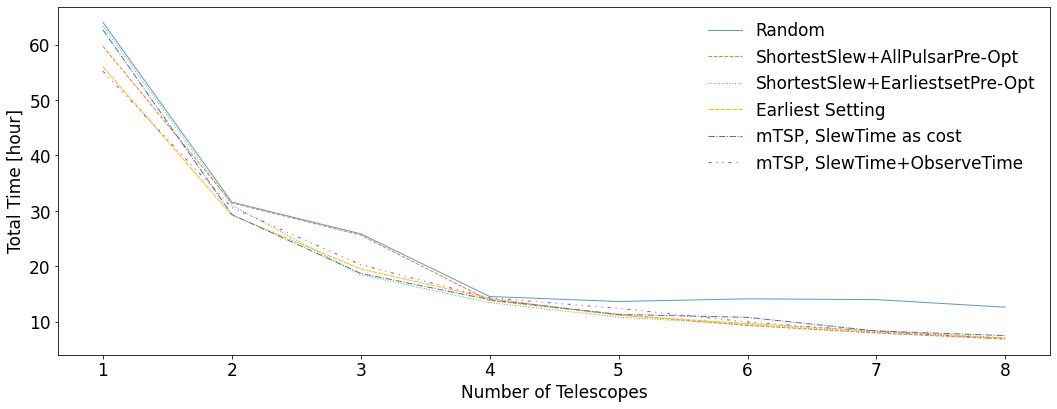

In [431]:
x = [1,2,3,4,5,6,7,8]
y1 = [1,2,3,4,5,6,7,8]
y2 = [1,2,3,4,5,6,7,8]
y3 = [1,2,3,4,5,6,7,8]
y4 = [1,2,3,4,5,6,7,8]
y5 = [1,2,3,4,5,6,7,8]
y6 = [1,2,3,4,5,6,7,8]
for i in range(8):
    y1[i] = rand_mean[i,1]
    y2[i] = shortall_mean[i,1]
    y3[i] = short_mean[i,1]
    y4[i] = early_mean[i,1]
    y5[i] = tsp_mean[i,1]
    y6[i] = tspInt_mean[i,1]
    
    
    
    
plt.rcParams['figure.figsize'] = (15, 6)
plt.rcParams['font.size'] = 17

plt.plot(x[0:8],y1[0:8], linewidth=1, linestyle="-",color='#5b9bd5')
plt.plot(x[0:8],y2[0:8], linewidth=1, linestyle="--",color='#ed7d31')
plt.plot(x[0:8],y3[0:8], linewidth=1, linestyle=":",color='#70ad47')
plt.plot(x[0:8],y4[0:8], linewidth=1, linestyle=(0,(5,1)),color='#ffc000')
plt.plot(x[0:8],y5[0:8], linewidth=1, linestyle="-.",color='#4472c4')
plt.plot(x[0:8],y6[0:8], linewidth=1, linestyle=(0, (3, 5, 1, 5, 1, 5)),color='#b235e6')

plt.xlabel('Number of Telescopes')
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(1))


plt.ylabel('Total Time [hour]')

#plt.title('Average Integration Time vs. Number of Telescopes')

plt.legend(frameon=False,loc = 'best',labels = ['Random', 'ShortestSlew+AllPulsarPre-Opt', 'ShortestSlew+EarliestsetPre-Opt', 'Earliest Setting', 'mTSP, SlewTime as cost','mTSP, SlewTime+ObserveTime'])
plt.tight_layout()
plt.savefig(f"results/{dataset}/telenum.pdf",pad_inches=0.02)

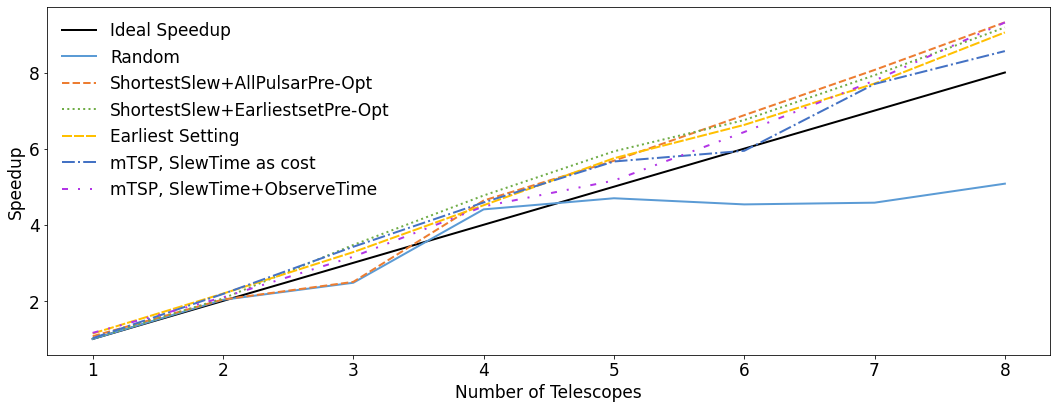

In [432]:
s1 = [1,2,3,4,5,6,7,8]
s2 = [1,2,3,4,5,6,7,8]
s3 = [1,2,3,4,5,6,7,8]
s4 = [1,2,3,4,5,6,7,8]
s5 = [1,2,3,4,5,6,7,8]
s6 = [1,2,3,4,5,6,7,8]

s1 = y1[0]/y1
s2 = y1[0]/y2
s3 = y1[0]/y3
s4 = y1[0]/y4
s5 = y1[0]/y5
s6 = y1[0]/y6

plt.rcParams['figure.figsize'] = (15, 6)
plt.rcParams['font.size'] = 17

plt.plot(x[0:8],x, linewidth=2, linestyle='-',color='k')
plt.plot(x[0:8],s1[0:8], linewidth=2, linestyle="-",color='#5b9bd5')
plt.plot(x[0:8],s2[0:8], linewidth=2, linestyle="--",color='#ed7d31')
plt.plot(x[0:8],s3[0:8], linewidth=2, linestyle=":",color='#70ad47')
plt.plot(x[0:8],s4[0:8], linewidth=2, linestyle=(0,(5,1)),color='#ffc000')
plt.plot(x[0:8],s5[0:8], linewidth=2, linestyle="-.",color='#4472c4')
plt.plot(x[0:8],s6[0:8], linewidth=2, linestyle=(0, (3, 5, 1, 5, 1, 5)),color='#b235e6')

plt.xlabel('Number of Telescopes')
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(1))

plt.ylabel('Speedup')

#plt.title('Average Integration Time vs. Number of Telescopes')

plt.legend(frameon=False,loc = 'best',labels = ['Ideal Speedup', 'Random', 'ShortestSlew+AllPulsarPre-Opt', 'ShortestSlew+EarliestsetPre-Opt', 'Earliest Setting', 'mTSP, SlewTime as cost','mTSP, SlewTime+ObserveTime'])
plt.tight_layout()
plt.savefig(f"results/{dataset}/speedup.pdf",pad_inches=0.02)

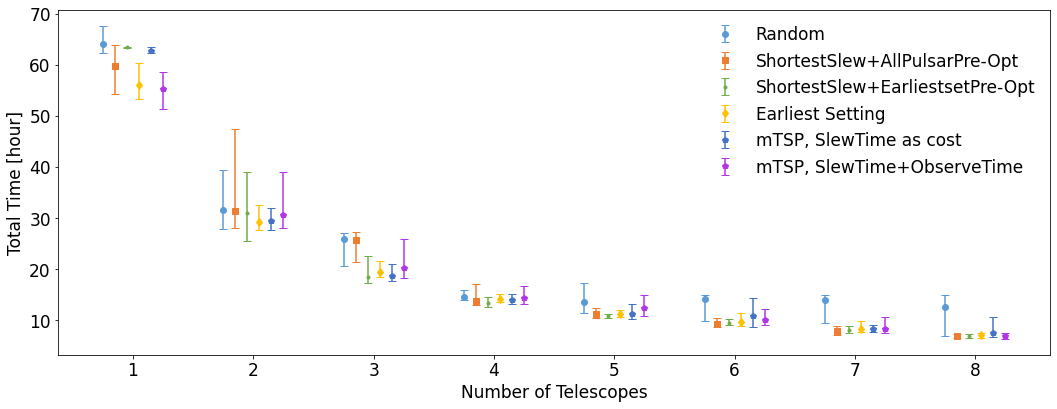

In [433]:
x_width = range(1,9)
x1_width = [i-0.25 for i in x_width]
x2_width = [i-0.15 for i in x_width]
x3_width = [i-0.05 for i in x_width]
x6_width = [i+0.25 for i in x_width]
x5_width = [i+0.15 for i in x_width]
x4_width = [i+0.05 for i in x_width]

plt.rcParams['figure.figsize'] = (15, 6)
plt.rcParams['font.size'] = 17


plt.errorbar(x1_width,y1, yerr=np.flip(rand_err,axis=0), fmt='o',capsize=4,color='#5b9bd5')
plt.errorbar(x2_width,y2, yerr=np.flip(shortall_err,axis=0), fmt='s',capsize=4,color='#ed7d31')
plt.errorbar(x3_width,y3, yerr=np.flip(short_err,axis=0), fmt='.',capsize=4,color='#70ad47')
plt.errorbar(x4_width,y4, yerr=np.flip(early_err,axis=0), fmt='d',capsize=4,color='#ffc000')
plt.errorbar(x5_width,y5, yerr=np.flip(tsp_err,axis=0), fmt='p',capsize=4,color='#4472c4')
plt.errorbar(x6_width,y6, yerr=np.flip(tspInt_err,axis=0), fmt='p',capsize=4,color='#b235e6')


plt.ylabel('Total Time [hour]')
plt.xlabel('Number of Telescopes')
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(1))

plt.legend(frameon=False,loc = 'best',labels = ['Random', 'ShortestSlew+AllPulsarPre-Opt', 'ShortestSlew+EarliestsetPre-Opt', 'Earliest Setting', 'mTSP, SlewTime as cost','mTSP, SlewTime+ObserveTime'])
plt.tight_layout()
plt.savefig(f"results/{dataset}/errorbar.pdf")

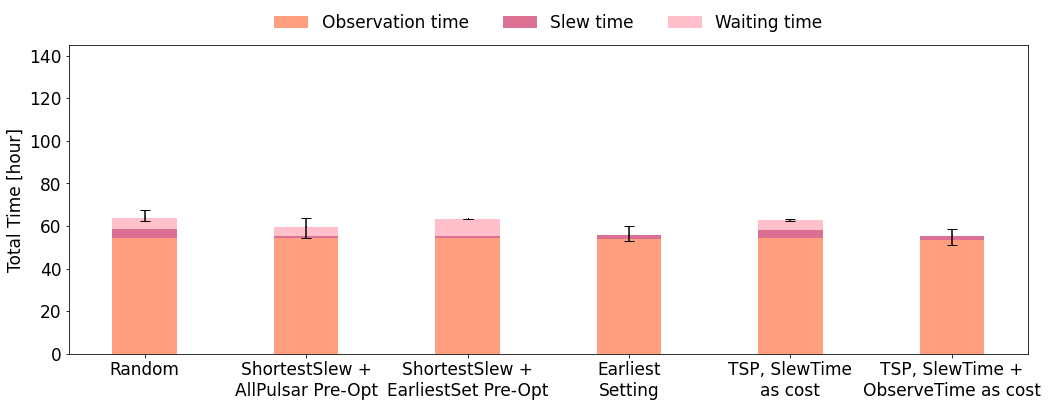

In [434]:
plt.rcParams['figure.figsize'] = (15, 6)
plt.rcParams['font.size'] = 17

slew=[rand_mean[0,2],shortall_mean[0,2], short_mean[0,2], early_mean[0,2], tsp_mean[0,2], tspInt_mean[0,2]]
wait=[rand_mean[0,3],shortall_mean[0,3], short_mean[0,3], early_mean[0,3], tsp_mean[0,3], tspInt_mean[0,3]]
observe=[rand_mean[0,4],shortall_mean[0,4], short_mean[0,4], early_mean[0,4], tsp_mean[0,4], tspInt_mean[0,4]]
plt.bar(range(6),observe,width=0.4,color=(255/255, 159/255, 127/255))
plt.bar(range(6),slew,width=0.4,color='palevioletred',bottom=observe)
plt.bar(range(6),wait,width=0.4,bottom=np.array(observe) + np.array(slew),color='pink')

plt.errorbar(range(6),[y1[0], y2[0], y3[0], y4[0], y5[0], y6[0]], yerr=np.flip(np.array([rand_err[:,0],shortall_err[:,0],short_err[:,0],early_err[:,0],tsp_err[:,0],tspInt_err[:,0]]).T,axis=0), fmt=' k,',capsize=5)

plt.xticks(range(6),['Random', 'ShortestSlew +\nAllPulsar Pre-Opt', 'ShortestSlew +\nEarliestSet Pre-Opt', 'Earliest\nSetting', 'TSP, SlewTime\nas cost','TSP, SlewTime +\nObserveTime as cost'])
plt.ylim(0,145)
plt.ylabel('Total Time [hour]')

plt.legend(frameon=False,ncol=3,loc = 'upper center', bbox_to_anchor=(0.5, 1.15),labels = ['Observation time','Slew time','Waiting time'])#
plt.tight_layout()
plt.savefig(f"results/{dataset}/single_tele.pdf")

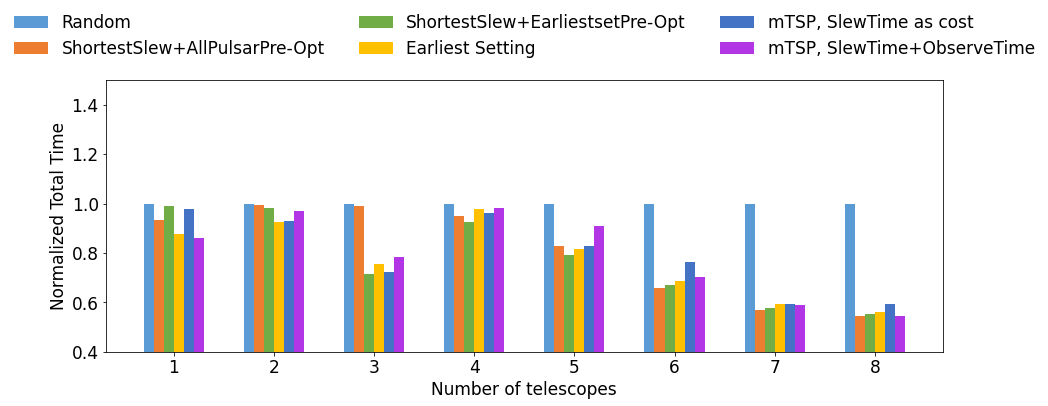

In [435]:
y=np.array([y1,y2,y3,y4,y5,y6])
z = np.zeros([6,8])
#err1=np.zeros([2,8])
#err2=np.zeros([2,8])
#err3=np.zeros([2,8])
#err4=np.zeros([2,8])
#err5=np.zeros([2,8])

for i in range(8):
    for j in range(6):
        z[j,i]=y[j,i]/y[0,i]
    #err1[:,i]=tsp_err[:,i]/min(y[:,i])
    #err2[:,i]=tspInt_err[:,i]/min(y[:,i])
    #err3[:,i]=rand_err[:,i]/min(y[:,i])
    #err4[:,i]=short_err[:,i]/min(y[:,i])
    #err5[:,i]=early_err[:,i]/min(y[:,i])

        

plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.size'] = 17

b1=plt.bar(x1_width,z[0,:],width=0.1,color='#5b9bd5')
b2=plt.bar(x2_width,z[1,:],width=0.1,color='#ed7d31')
b3=plt.bar(x3_width,z[2,:],width=0.1,color='#70ad47')
b4=plt.bar(x4_width,z[3,:],width=0.1,color='#ffc000')
b5=plt.bar(x5_width,z[4,:],width=0.1,color='#4472c4')
b6=plt.bar(x6_width,z[5,:],width=0.1,color='#b235e6')

#plt.errorbar(x1_width,z[0,:],yerr=err1, fmt=' k,',capsize=5)
#plt.errorbar(x2_width,z[1,:],yerr=err2, fmt=' k,',capsize=5)
#plt.errorbar(x3_width,z[2,:],yerr=err3, fmt=' k,',capsize=5)
#plt.errorbar(x4_width,z[3,:],yerr=err4, fmt=' k,',capsize=5)
#plt.errorbar(x5_width,z[4,:],yerr=err5, fmt=' k,',capsize=5)


plt.ylim(0.4,1.5)
#plt.xticks(range(len(x)),x)

plt.xlabel("Number of telescopes")
plt.ylabel("Normalized Total Time")

plt.legend(frameon=False,ncol=3,loc = 'upper center', bbox_to_anchor=(0.5, 1.3), labels = ['Random', 'ShortestSlew+AllPulsarPre-Opt', 'ShortestSlew+EarliestsetPre-Opt', 'Earliest Setting', 'mTSP, SlewTime as cost','mTSP, SlewTime+ObserveTime'])#
plt.savefig(f"results/{dataset}/telenum_bar.pdf")

## Dataset 2

In [436]:
dataset = 'dataset2'

### Number of telescopes performance analysis

In [437]:
policy = 'tsp'
tsp_mean = np.zeros([8, 16])
tsp_err = np.zeros([2, 8])


file_dir = 'results/'+dataset+'/'+ 'tsp1' + '/' + 'batch_2017_3_21_13_0_0_.csv'
tsp_mean[0,:] = np.mean(data_reader(file_dir,range(5,15)).astype(np.float), axis=0)
tsp_err[0,0] = max(data_reader(file_dir,range(5,15)).astype(np.float)[:,1])-tsp_mean[0,1]
tsp_err[1,0] = tsp_mean[0,1]-min(data_reader(file_dir,range(5,15)).astype(np.float)[:,1])
for j in range(2,9):
    tsp_data = np.zeros([10, j, 16])
    for i in range(10):
        file_dir = 'results/'+dataset+'/'+ policy + str(j) + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
        tsp_data[i,:,:] = data_reader(file_dir,range(5,5+j))
    tsp_mean[j-1,:] = np.mean(np.mean(tsp_data, axis=0), axis=0)
    tsp_err[0,j-1] = max(np.mean(tsp_data, axis=1)[:,1])-tsp_mean[j-1,1]
    tsp_err[1,j-1] = tsp_mean[j-1,1]-min(np.mean(tsp_data, axis=1)[:,1])

In [438]:
policy = 'tspInt'
tspInt_mean = np.zeros([8, 16])
tspInt_err = np.zeros([2, 8])

file_dir = 'results/'+dataset+'/'+ 'tspInt1' + '/' + 'batch_2017_3_21_13_0_0_.csv'
tspInt_mean[0,:] = np.mean(data_reader(file_dir,range(5,15)).astype(np.float), axis=0)
tspInt_err[0,0] = max(data_reader(file_dir,range(5,15)).astype(np.float)[:,1])-tspInt_mean[0,1]
tspInt_err[1,0] = tspInt_mean[0,1]-min(data_reader(file_dir,range(5,15)).astype(np.float)[:,1])
for j in range(2,9):
    tspInt_data = np.zeros([10, j, 16])
    for i in range(10):
        file_dir = 'results/'+dataset+'/'+ policy + str(j) + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
        tspInt_data[i,:,:] = data_reader(file_dir,range(5,5+j))
    tspInt_mean[j-1,:] = np.mean(np.mean(tspInt_data, axis=0), axis=0)
    tspInt_err[0,j-1] = max(np.mean(tspInt_data, axis=1)[:,1])-tspInt_mean[j-1,1]
    tspInt_err[1,j-1] = tspInt_mean[j-1,1]-min(np.mean(tspInt_data, axis=1)[:,1])

In [439]:
policy = 'Random'
rand_mean = np.zeros([8, 16])
rand_err = np.zeros([2, 8])

file_dir = 'results/'+dataset+'/'+ 'Random1tele' + '/' + 'batch_2017_3_21_13_0_0_.csv'
rand_mean[0,:] = np.mean(data_reader(file_dir,range(5,15)).astype(np.float), axis=0)
rand_err[0,0] = max(data_reader(file_dir,range(5,15)).astype(np.float)[:,1])-rand_mean[0,1]
rand_err[1,0] = rand_mean[0,1]-min(data_reader(file_dir,range(5,15)).astype(np.float)[:,1])
for j in range(2,9):
    rand_data = np.zeros([10, j, 16])
    for i in range(10):
        file_dir = 'results/'+dataset+'/'+ policy + str(j) + 'tele' + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
        rand_data[i,:,:] = data_reader(file_dir,range(5,5+j))
    rand_mean[j-1,:] = np.mean(np.mean(rand_data, axis=0), axis=0)
    rand_err[0,j-1] = max(np.mean(rand_data, axis=1)[:,1])-rand_mean[j-1,1]
    rand_err[1,j-1] = rand_mean[j-1,1]-min(np.mean(rand_data, axis=1)[:,1])

In [440]:
policy = 'ShortestSlew'
shortall_mean = np.zeros([8, 16])
shortall_err = np.zeros([2, 8])

file_dir = 'results/'+dataset+'/'+ 'ShortestSlew1tele' + '/' + 'batch_2017_3_21_13_0_0_.csv'
shortall_mean[0,:] = np.mean(data_reader(file_dir,range(5,15)).astype(np.float), axis=0)
shortall_err[0,0] = max(data_reader(file_dir,range(5,15)).astype(np.float)[:,1])-shortall_mean[0,1]
shortall_err[1,0] = shortall_mean[0,1]-min(data_reader(file_dir,range(5,15)).astype(np.float)[:,1])
for j in range(2,9):
    shortall_data = np.zeros([10, j, 16])
    for i in range(10):
        file_dir = 'results/'+dataset+'/'+ policy + str(j) + 'tele' + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
        shortall_data[i,:,:] = data_reader(file_dir,range(5,5+j))
    shortall_mean[j-1,:] = np.mean(np.mean(shortall_data, axis=0), axis=0)
    shortall_err[0,j-1] = max(np.mean(shortall_data, axis=1)[:,1])-shortall_mean[j-1,1]
    shortall_err[1,j-1] = shortall_mean[j-1,1]-min(np.mean(shortall_data, axis=1)[:,1])

In [441]:
policy = 'ShortestSlew30neig'
short_mean = np.zeros([8, 16])
short_err = np.zeros([2, 8])

file_dir = 'results/'+dataset+'/'+ 'ShortestSlew30neig1' + '/' + 'batch_2017_3_21_13_0_0_.csv'
short_mean[0,:] = np.mean(data_reader(file_dir,range(5,15)).astype(np.float), axis=0)
short_err[0,0] = max(data_reader(file_dir,range(5,15)).astype(np.float)[:,1])-short_mean[0,1]
short_err[1,0] = short_mean[0,1]-min(data_reader(file_dir,range(5,15)).astype(np.float)[:,1])
for j in range(2,9):
    short_data = np.zeros([10, j, 16])
    for i in range(10):
        file_dir = 'results/'+dataset+'/'+ policy + str(j) + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
        short_data[i,:,:] = data_reader(file_dir,range(5,5+j))
    short_mean[j-1,:] = np.mean(np.mean(short_data, axis=0), axis=0)
    short_err[0,j-1] = max(np.mean(short_data, axis=1)[:,1])-short_mean[j-1,1]
    short_err[1,j-1] = short_mean[j-1,1]-min(np.mean(short_data, axis=1)[:,1])

In [442]:
#policy = 'tspInt'
early_mean = np.zeros([8, 16])
early_err = np.zeros([2, 8])

file_dir = 'results/'+dataset+'/'+ 'EarliestSetting1tele' + '/' + 'batch_2017_3_21_13_0_0_.csv'
early_mean[0,:] = np.mean(data_reader(file_dir,range(5,15)).astype(np.float), axis=0)
early_err[0,0] = max(data_reader(file_dir,range(5,15)).astype(np.float)[:,1])-early_mean[0,1]
early_err[1,0] = early_mean[0,1]-min(data_reader(file_dir,range(5,15)).astype(np.float)[:,1])
for j in range(2,9):
    early_data = np.zeros([10, j, 16])
    for i in range(10):
        file_dir = 'results/'+dataset+'/'+ 'EarliestSetting' + str(j) + 'tele' + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
        early_data[i,:,:] = data_reader(file_dir,range(5,5+j))
    early_mean[j-1,:] = np.mean(np.mean(early_data, axis=0), axis=0)
    early_err[0,j-1] = max(np.mean(early_data, axis=1)[:,1])-early_mean[j-1,1]
    early_err[1,j-1] = early_mean[j-1,1]-min(np.mean(early_data, axis=1)[:,1])

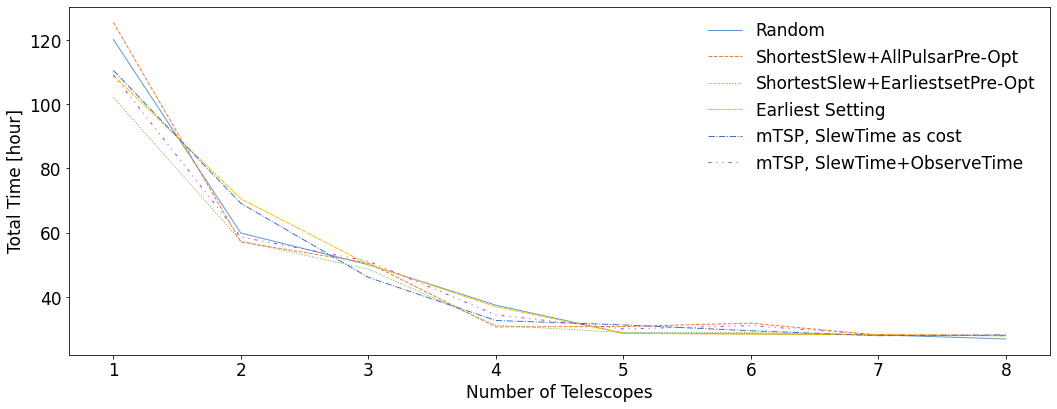

In [443]:
x = [1,2,3,4,5,6,7,8]
y1 = [1,2,3,4,5,6,7,8]
y2 = [1,2,3,4,5,6,7,8]
y3 = [1,2,3,4,5,6,7,8]
y4 = [1,2,3,4,5,6,7,8]
y5 = [1,2,3,4,5,6,7,8]
y6 = [1,2,3,4,5,6,7,8]
for i in range(8):
    y1[i] = rand_mean[i,1]
    y2[i] = shortall_mean[i,1]
    y3[i] = short_mean[i,1]
    y4[i] = early_mean[i,1]
    y5[i] = tsp_mean[i,1]
    y6[i] = tspInt_mean[i,1]
    
    
    
    
plt.rcParams['figure.figsize'] = (15, 6)
plt.rcParams['font.size'] = 17

plt.plot(x[0:8],y1[0:8], linewidth=1, linestyle="-",color='#5b9bd5')
plt.plot(x[0:8],y2[0:8], linewidth=1, linestyle="--",color='#ed7d31')
plt.plot(x[0:8],y3[0:8], linewidth=1, linestyle=":",color='#70ad47')
plt.plot(x[0:8],y4[0:8], linewidth=1, linestyle=(0,(5,1)),color='#ffc000')
plt.plot(x[0:8],y5[0:8], linewidth=1, linestyle="-.",color='#4472c4')
plt.plot(x[0:8],y6[0:8], linewidth=1, linestyle=(0, (3, 5, 1, 5, 1, 5)),color='#b235e6')

plt.xlabel('Number of Telescopes')
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(1))


plt.ylabel('Total Time [hour]')

#plt.title('Average Integration Time vs. Number of Telescopes')

plt.legend(frameon=False,loc = 'best',labels = ['Random', 'ShortestSlew+AllPulsarPre-Opt', 'ShortestSlew+EarliestsetPre-Opt', 'Earliest Setting', 'mTSP, SlewTime as cost','mTSP, SlewTime+ObserveTime'])
plt.tight_layout()
plt.savefig(f"results/{dataset}/telenum.pdf",pad_inches=0.02)

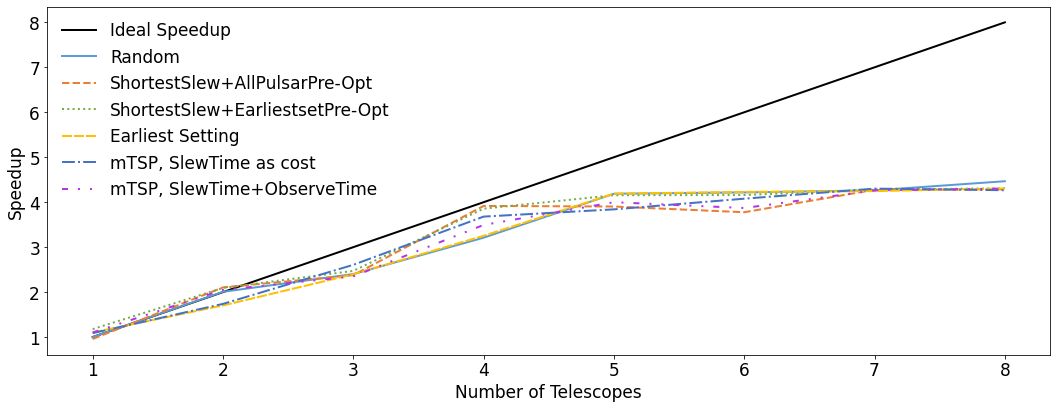

In [444]:
s1 = [1,2,3,4,5,6,7,8]
s2 = [1,2,3,4,5,6,7,8]
s3 = [1,2,3,4,5,6,7,8]
s4 = [1,2,3,4,5,6,7,8]
s5 = [1,2,3,4,5,6,7,8]
s6 = [1,2,3,4,5,6,7,8]

s1 = y1[0]/y1
s2 = y1[0]/y2
s3 = y1[0]/y3
s4 = y1[0]/y4
s5 = y1[0]/y5
s6 = y1[0]/y6

plt.rcParams['figure.figsize'] = (15, 6)
plt.rcParams['font.size'] = 17

plt.plot(x[0:8],x, linewidth=2, linestyle='-',color='k')
plt.plot(x[0:8],s1[0:8], linewidth=2, linestyle="-",color='#5b9bd5')
plt.plot(x[0:8],s2[0:8], linewidth=2, linestyle="--",color='#ed7d31')
plt.plot(x[0:8],s3[0:8], linewidth=2, linestyle=":",color='#70ad47')
plt.plot(x[0:8],s4[0:8], linewidth=2, linestyle=(0,(5,1)),color='#ffc000')
plt.plot(x[0:8],s5[0:8], linewidth=2, linestyle="-.",color='#4472c4')
plt.plot(x[0:8],s6[0:8], linewidth=2, linestyle=(0, (3, 5, 1, 5, 1, 5)),color='#b235e6')

plt.xlabel('Number of Telescopes')
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(1))

plt.ylabel('Speedup')

#plt.title('Average Integration Time vs. Number of Telescopes')

plt.legend(frameon=False,loc = 'best',labels = ['Ideal Speedup', 'Random', 'ShortestSlew+AllPulsarPre-Opt', 'ShortestSlew+EarliestsetPre-Opt', 'Earliest Setting', 'mTSP, SlewTime as cost','mTSP, SlewTime+ObserveTime'])
plt.tight_layout()
plt.savefig(f"results/{dataset}/speedup.pdf",pad_inches=0.02)

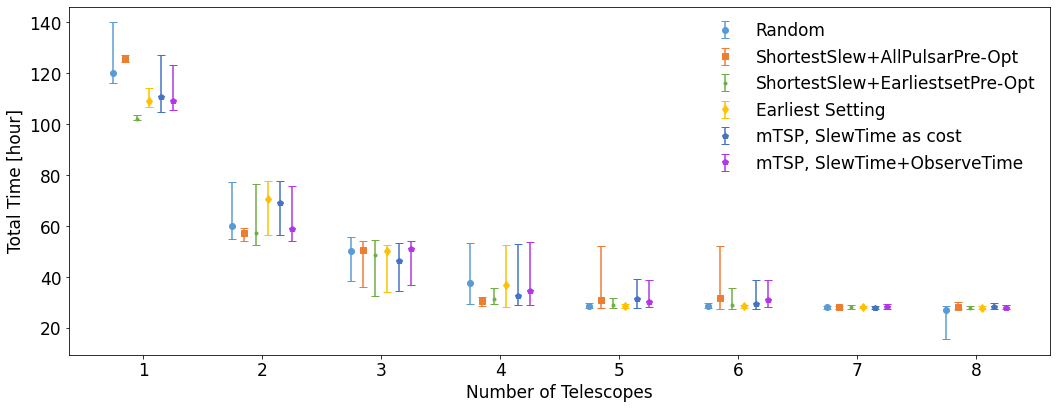

In [445]:
x_width = range(1,9)
x1_width = [i-0.25 for i in x_width]
x2_width = [i-0.15 for i in x_width]
x3_width = [i-0.05 for i in x_width]
x6_width = [i+0.25 for i in x_width]
x5_width = [i+0.15 for i in x_width]
x4_width = [i+0.05 for i in x_width]

plt.rcParams['figure.figsize'] = (15, 6)
plt.rcParams['font.size'] = 17


plt.errorbar(x1_width,y1, yerr=np.flip(rand_err,axis=0), fmt='o',capsize=4,color='#5b9bd5')
plt.errorbar(x2_width,y2, yerr=np.flip(shortall_err,axis=0), fmt='s',capsize=4,color='#ed7d31')
plt.errorbar(x3_width,y3, yerr=np.flip(short_err,axis=0), fmt='.',capsize=4,color='#70ad47')
plt.errorbar(x4_width,y4, yerr=np.flip(early_err,axis=0), fmt='d',capsize=4,color='#ffc000')
plt.errorbar(x5_width,y5, yerr=np.flip(tsp_err,axis=0), fmt='p',capsize=4,color='#4472c4')
plt.errorbar(x6_width,y6, yerr=np.flip(tspInt_err,axis=0), fmt='p',capsize=4,color='#b235e6')


plt.ylabel('Total Time [hour]')
plt.xlabel('Number of Telescopes')
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(1))

plt.legend(frameon=False,loc = 'best',labels = ['Random', 'ShortestSlew+AllPulsarPre-Opt', 'ShortestSlew+EarliestsetPre-Opt', 'Earliest Setting', 'mTSP, SlewTime as cost','mTSP, SlewTime+ObserveTime'])
plt.tight_layout()
plt.savefig(f"results/{dataset}/errorbar.pdf")

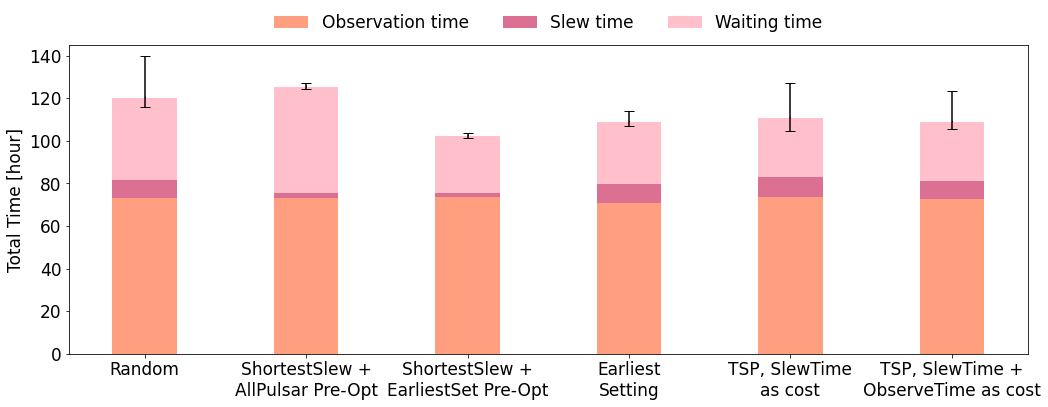

In [446]:
plt.rcParams['figure.figsize'] = (15, 6)
plt.rcParams['font.size'] = 17

slew=[rand_mean[0,2],shortall_mean[0,2], short_mean[0,2], early_mean[0,2], tsp_mean[0,2], tspInt_mean[0,2]]
wait=[rand_mean[0,3],shortall_mean[0,3], short_mean[0,3], early_mean[0,3], tsp_mean[0,3], tspInt_mean[0,3]]
observe=[rand_mean[0,4],shortall_mean[0,4], short_mean[0,4], early_mean[0,4], tsp_mean[0,4], tspInt_mean[0,4]]
plt.bar(range(6),observe,width=0.4,color=(255/255, 159/255, 127/255))
plt.bar(range(6),slew,width=0.4,color='palevioletred',bottom=observe)
plt.bar(range(6),wait,width=0.4,bottom=np.array(observe) + np.array(slew),color='pink')

plt.errorbar(range(6),[y1[0], y2[0], y3[0], y4[0], y5[0], y6[0]], yerr=np.flip(np.array([rand_err[:,0],shortall_err[:,0],short_err[:,0],early_err[:,0],tsp_err[:,0],tspInt_err[:,0]]).T,axis=0), fmt=' k,',capsize=5)

plt.xticks(range(6),['Random', 'ShortestSlew +\nAllPulsar Pre-Opt', 'ShortestSlew +\nEarliestSet Pre-Opt', 'Earliest\nSetting', 'TSP, SlewTime\nas cost','TSP, SlewTime +\nObserveTime as cost'])
plt.ylim(0,145)
plt.ylabel('Total Time [hour]')

plt.legend(frameon=False,ncol=3,loc = 'upper center', bbox_to_anchor=(0.5, 1.15),labels = ['Observation time','Slew time','Waiting time'])#
plt.tight_layout()
plt.savefig(f"results/{dataset}/single_tele.pdf")

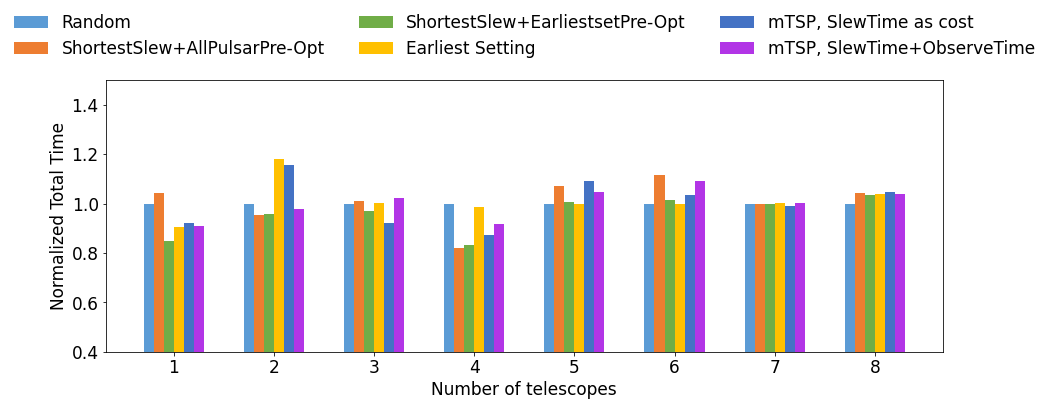

In [447]:
y=np.array([y1,y2,y3,y4,y5,y6])
z = np.zeros([6,8])
#err1=np.zeros([2,8])
#err2=np.zeros([2,8])
#err3=np.zeros([2,8])
#err4=np.zeros([2,8])
#err5=np.zeros([2,8])

for i in range(8):
    for j in range(6):
        z[j,i]=y[j,i]/y[0,i]
    #err1[:,i]=tsp_err[:,i]/min(y[:,i])
    #err2[:,i]=tspInt_err[:,i]/min(y[:,i])
    #err3[:,i]=rand_err[:,i]/min(y[:,i])
    #err4[:,i]=short_err[:,i]/min(y[:,i])
    #err5[:,i]=early_err[:,i]/min(y[:,i])

        

plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.size'] = 17

b1=plt.bar(x1_width,z[0,:],width=0.1,color='#5b9bd5')
b2=plt.bar(x2_width,z[1,:],width=0.1,color='#ed7d31')
b3=plt.bar(x3_width,z[2,:],width=0.1,color='#70ad47')
b4=plt.bar(x4_width,z[3,:],width=0.1,color='#ffc000')
b5=plt.bar(x5_width,z[4,:],width=0.1,color='#4472c4')
b6=plt.bar(x6_width,z[5,:],width=0.1,color='#b235e6')

#plt.errorbar(x1_width,z[0,:],yerr=err1, fmt=' k,',capsize=5)
#plt.errorbar(x2_width,z[1,:],yerr=err2, fmt=' k,',capsize=5)
#plt.errorbar(x3_width,z[2,:],yerr=err3, fmt=' k,',capsize=5)
#plt.errorbar(x4_width,z[3,:],yerr=err4, fmt=' k,',capsize=5)
#plt.errorbar(x5_width,z[4,:],yerr=err5, fmt=' k,',capsize=5)


plt.ylim(0.4,1.5)
#plt.xticks(range(len(x)),x)

plt.xlabel("Number of telescopes")
plt.ylabel("Normalized Total Time")

plt.legend(frameon=False,ncol=3,loc = 'upper center', bbox_to_anchor=(0.5, 1.3), labels = ['Random', 'ShortestSlew+AllPulsarPre-Opt', 'ShortestSlew+EarliestsetPre-Opt', 'Earliest Setting', 'mTSP, SlewTime as cost','mTSP, SlewTime+ObserveTime'])#
plt.savefig(f"results/{dataset}/telenum_bar.pdf")

## Dataset 3

In [448]:
dataset = 'dataset3'

### Number of telescopes performance analysis

In [449]:
policy = 'tsp'
tsp_mean = np.zeros([8, 16])
tsp_err = np.zeros([2, 8])


file_dir = 'results/'+dataset+'/'+ 'tsp1' + '/' + 'batch_2017_3_21_13_0_0_.csv'
tsp_mean[0,:] = np.mean(data_reader(file_dir,range(5,15)).astype(np.float), axis=0)
tsp_err[0,0] = max(data_reader(file_dir,range(5,15)).astype(np.float)[:,1])-tsp_mean[0,1]
tsp_err[1,0] = tsp_mean[0,1]-min(data_reader(file_dir,range(5,15)).astype(np.float)[:,1])
for j in range(2,9):
    tsp_data = np.zeros([10, j, 16])
    for i in range(10):
        file_dir = 'results/'+dataset+'/'+ policy + str(j) + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
        tsp_data[i,:,:] = data_reader(file_dir,range(5,5+j))
    tsp_mean[j-1,:] = np.mean(np.mean(tsp_data, axis=0), axis=0)
    tsp_err[0,j-1] = max(np.mean(tsp_data, axis=1)[:,1])-tsp_mean[j-1,1]
    tsp_err[1,j-1] = tsp_mean[j-1,1]-min(np.mean(tsp_data, axis=1)[:,1])

In [450]:
policy = 'tspInt'
tspInt_mean = np.zeros([8, 16])
tspInt_err = np.zeros([2, 8])

file_dir = 'results/'+dataset+'/'+ 'tspInt1' + '/' + 'batch_2017_3_21_13_0_0_.csv'
tspInt_mean[0,:] = np.mean(data_reader(file_dir,range(5,15)).astype(np.float), axis=0)
tspInt_err[0,0] = max(data_reader(file_dir,range(5,15)).astype(np.float)[:,1])-tspInt_mean[0,1]
tspInt_err[1,0] = tspInt_mean[0,1]-min(data_reader(file_dir,range(5,15)).astype(np.float)[:,1])
for j in range(2,9):
    tspInt_data = np.zeros([10, j, 16])
    for i in range(10):
        file_dir = 'results/'+dataset+'/'+ policy + str(j) + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
        tspInt_data[i,:,:] = data_reader(file_dir,range(5,5+j))
    tspInt_mean[j-1,:] = np.mean(np.mean(tspInt_data, axis=0), axis=0)
    tspInt_err[0,j-1] = max(np.mean(tspInt_data, axis=1)[:,1])-tspInt_mean[j-1,1]
    tspInt_err[1,j-1] = tspInt_mean[j-1,1]-min(np.mean(tspInt_data, axis=1)[:,1])

In [451]:
policy = 'Random'
rand_mean = np.zeros([8, 16])
rand_err = np.zeros([2, 8])

file_dir = 'results/'+dataset+'/'+ 'Random1tele' + '/' + 'batch_2017_3_21_13_0_0_.csv'
rand_mean[0,:] = np.mean(data_reader(file_dir,range(5,15)).astype(np.float), axis=0)
rand_err[0,0] = max(data_reader(file_dir,range(5,15)).astype(np.float)[:,1])-rand_mean[0,1]
rand_err[1,0] = rand_mean[0,1]-min(data_reader(file_dir,range(5,15)).astype(np.float)[:,1])
for j in range(2,9):
    rand_data = np.zeros([10, j, 16])
    for i in range(10):
        file_dir = 'results/'+dataset+'/'+ policy + str(j) + 'tele' + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
        rand_data[i,:,:] = data_reader(file_dir,range(5,5+j))
    rand_mean[j-1,:] = np.mean(np.mean(rand_data, axis=0), axis=0)
    rand_err[0,j-1] = max(np.mean(rand_data, axis=1)[:,1])-rand_mean[j-1,1]
    rand_err[1,j-1] = rand_mean[j-1,1]-min(np.mean(rand_data, axis=1)[:,1])

In [452]:
policy = 'ShortestSlew'
shortall_mean = np.zeros([8, 16])
shortall_err = np.zeros([2, 8])

file_dir = 'results/'+dataset+'/'+ 'ShortestSlew1tele' + '/' + 'batch_2017_3_21_13_0_0_.csv'
shortall_mean[0,:] = np.mean(data_reader(file_dir,range(5,15)).astype(np.float), axis=0)
shortall_err[0,0] = max(data_reader(file_dir,range(5,15)).astype(np.float)[:,1])-shortall_mean[0,1]
shortall_err[1,0] = shortall_mean[0,1]-min(data_reader(file_dir,range(5,15)).astype(np.float)[:,1])
for j in range(2,9):
    shortall_data = np.zeros([10, j, 16])
    for i in range(10):
        file_dir = 'results/'+dataset+'/'+ policy + str(j) + 'tele' + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
        shortall_data[i,:,:] = data_reader(file_dir,range(5,5+j))
    shortall_mean[j-1,:] = np.mean(np.mean(shortall_data, axis=0), axis=0)
    shortall_err[0,j-1] = max(np.mean(shortall_data, axis=1)[:,1])-shortall_mean[j-1,1]
    shortall_err[1,j-1] = shortall_mean[j-1,1]-min(np.mean(shortall_data, axis=1)[:,1])

In [453]:
policy = 'ShortestSlew30neig'
short_mean = np.zeros([8, 16])
short_err = np.zeros([2, 8])

file_dir = 'results/'+dataset+'/'+ 'ShortestSlew30neig1' + '/' + 'batch_2017_3_21_13_0_0_.csv'
short_mean[0,:] = np.mean(data_reader(file_dir,range(5,15)).astype(np.float), axis=0)
short_err[0,0] = max(data_reader(file_dir,range(5,15)).astype(np.float)[:,1])-short_mean[0,1]
short_err[1,0] = short_mean[0,1]-min(data_reader(file_dir,range(5,15)).astype(np.float)[:,1])
for j in range(2,9):
    short_data = np.zeros([10, j, 16])
    for i in range(10):
        file_dir = 'results/'+dataset+'/'+ policy + str(j) + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
        short_data[i,:,:] = data_reader(file_dir,range(5,5+j))
    short_mean[j-1,:] = np.mean(np.mean(short_data, axis=0), axis=0)
    short_err[0,j-1] = max(np.mean(short_data, axis=1)[:,1])-short_mean[j-1,1]
    short_err[1,j-1] = short_mean[j-1,1]-min(np.mean(short_data, axis=1)[:,1])

In [454]:
#policy = 'tspInt'
early_mean = np.zeros([8, 16])
early_err = np.zeros([2, 8])

file_dir = 'results/'+dataset+'/'+ 'EarliestSetting1tele' + '/' + 'batch_2017_3_21_13_0_0_.csv'
early_mean[0,:] = np.mean(data_reader(file_dir,range(5,15)).astype(np.float), axis=0)
early_err[0,0] = max(data_reader(file_dir,range(5,15)).astype(np.float)[:,1])-early_mean[0,1]
early_err[1,0] = early_mean[0,1]-min(data_reader(file_dir,range(5,15)).astype(np.float)[:,1])
for j in range(2,9):
    early_data = np.zeros([10, j, 16])
    for i in range(10):
        file_dir = 'results/'+dataset+'/'+ 'EarliestSetting' + str(j) + 'tele' + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
        early_data[i,:,:] = data_reader(file_dir,range(5,5+j))
    early_mean[j-1,:] = np.mean(np.mean(early_data, axis=0), axis=0)
    early_err[0,j-1] = max(np.mean(early_data, axis=1)[:,1])-early_mean[j-1,1]
    early_err[1,j-1] = early_mean[j-1,1]-min(np.mean(early_data, axis=1)[:,1])

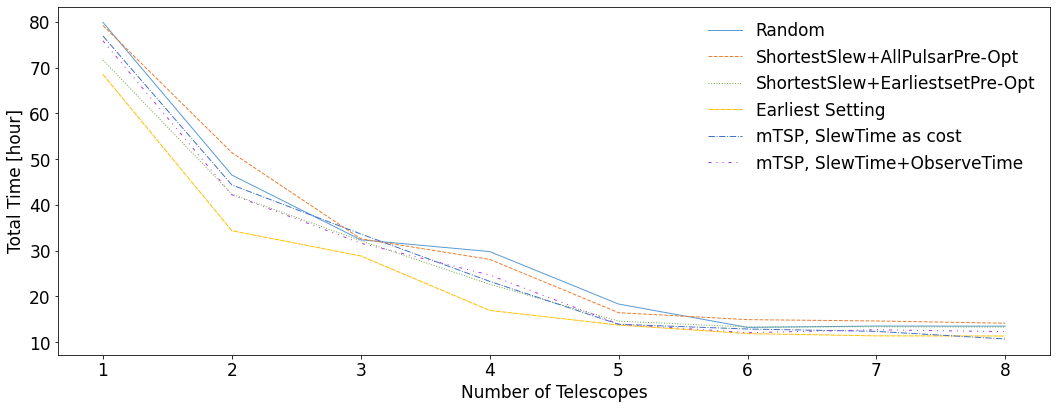

In [455]:
x = [1,2,3,4,5,6,7,8]
y1 = [1,2,3,4,5,6,7,8]
y2 = [1,2,3,4,5,6,7,8]
y3 = [1,2,3,4,5,6,7,8]
y4 = [1,2,3,4,5,6,7,8]
y5 = [1,2,3,4,5,6,7,8]
y6 = [1,2,3,4,5,6,7,8]
for i in range(8):
    y1[i] = rand_mean[i,1]
    y2[i] = shortall_mean[i,1]
    y3[i] = short_mean[i,1]
    y4[i] = early_mean[i,1]
    y5[i] = tsp_mean[i,1]
    y6[i] = tspInt_mean[i,1]
    
    
    
    
plt.rcParams['figure.figsize'] = (15, 6)
plt.rcParams['font.size'] = 17

plt.plot(x[0:8],y1[0:8], linewidth=1, linestyle="-",color='#5b9bd5')
plt.plot(x[0:8],y2[0:8], linewidth=1, linestyle="--",color='#ed7d31')
plt.plot(x[0:8],y3[0:8], linewidth=1, linestyle=":",color='#70ad47')
plt.plot(x[0:8],y4[0:8], linewidth=1, linestyle=(0,(5,1)),color='#ffc000')
plt.plot(x[0:8],y5[0:8], linewidth=1, linestyle="-.",color='#4472c4')
plt.plot(x[0:8],y6[0:8], linewidth=1, linestyle=(0, (3, 5, 1, 5, 1, 5)),color='#b235e6')

plt.xlabel('Number of Telescopes')
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(1))


plt.ylabel('Total Time [hour]')

#plt.title('Average Integration Time vs. Number of Telescopes')

plt.legend(frameon=False,loc = 'best',labels = ['Random', 'ShortestSlew+AllPulsarPre-Opt', 'ShortestSlew+EarliestsetPre-Opt', 'Earliest Setting', 'mTSP, SlewTime as cost','mTSP, SlewTime+ObserveTime'])
plt.tight_layout()
plt.savefig(f"results/{dataset}/telenum.pdf",pad_inches=0.02)

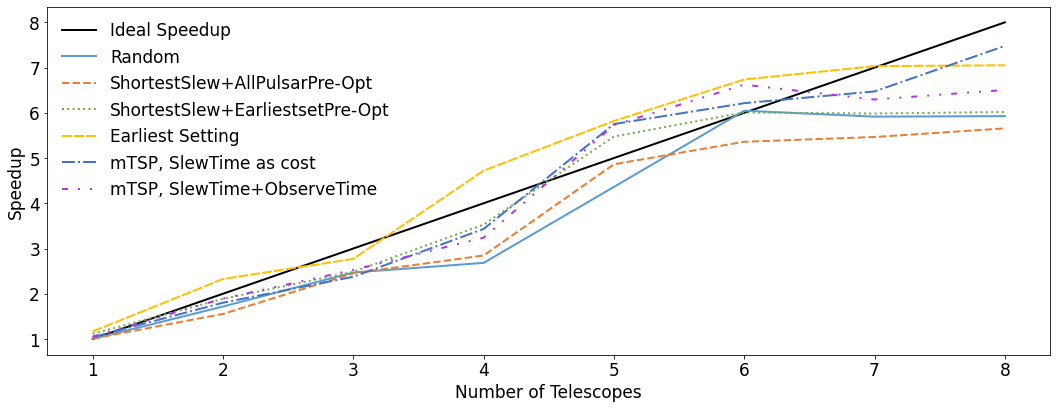

In [456]:
s1 = [1,2,3,4,5,6,7,8]
s2 = [1,2,3,4,5,6,7,8]
s3 = [1,2,3,4,5,6,7,8]
s4 = [1,2,3,4,5,6,7,8]
s5 = [1,2,3,4,5,6,7,8]
s6 = [1,2,3,4,5,6,7,8]

s1 = y1[0]/y1
s2 = y1[0]/y2
s3 = y1[0]/y3
s4 = y1[0]/y4
s5 = y1[0]/y5
s6 = y1[0]/y6

plt.rcParams['figure.figsize'] = (15, 6)
plt.rcParams['font.size'] = 17

plt.plot(x[0:8],x, linewidth=2, linestyle='-',color='k')
plt.plot(x[0:8],s1[0:8], linewidth=2, linestyle="-",color='#5b9bd5')
plt.plot(x[0:8],s2[0:8], linewidth=2, linestyle="--",color='#ed7d31')
plt.plot(x[0:8],s3[0:8], linewidth=2, linestyle=":",color='#70ad47')
plt.plot(x[0:8],s4[0:8], linewidth=2, linestyle=(0,(5,1)),color='#ffc000')
plt.plot(x[0:8],s5[0:8], linewidth=2, linestyle="-.",color='#4472c4')
plt.plot(x[0:8],s6[0:8], linewidth=2, linestyle=(0, (3, 5, 1, 5, 1, 5)),color='#b235e6')

plt.xlabel('Number of Telescopes')
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(1))

plt.ylabel('Speedup')

#plt.title('Average Integration Time vs. Number of Telescopes')

plt.legend(frameon=False,loc = 'best',labels = ['Ideal Speedup', 'Random', 'ShortestSlew+AllPulsarPre-Opt', 'ShortestSlew+EarliestsetPre-Opt', 'Earliest Setting', 'mTSP, SlewTime as cost','mTSP, SlewTime+ObserveTime'])
plt.tight_layout()
plt.savefig(f"results/{dataset}/speedup.pdf",pad_inches=0.02)

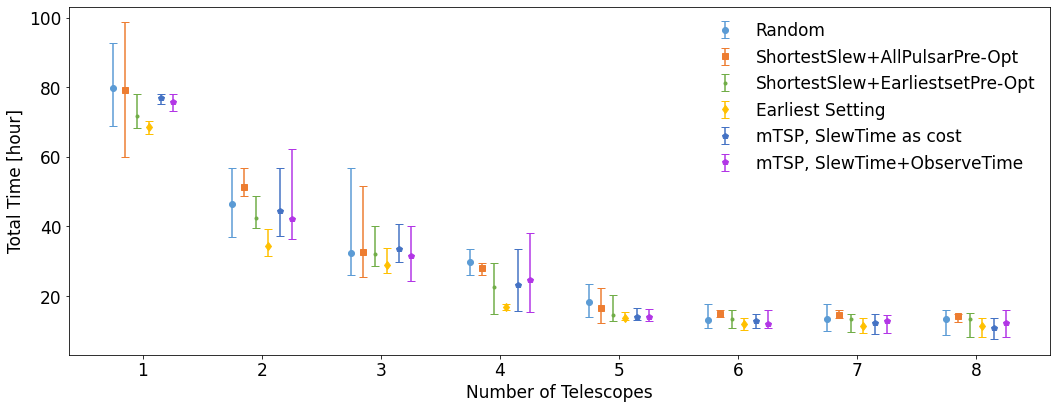

In [457]:
x_width = range(1,9)
x1_width = [i-0.25 for i in x_width]
x2_width = [i-0.15 for i in x_width]
x3_width = [i-0.05 for i in x_width]
x6_width = [i+0.25 for i in x_width]
x5_width = [i+0.15 for i in x_width]
x4_width = [i+0.05 for i in x_width]

plt.rcParams['figure.figsize'] = (15, 6)
plt.rcParams['font.size'] = 17


plt.errorbar(x1_width,y1, yerr=np.flip(rand_err,axis=0), fmt='o',capsize=4,color='#5b9bd5')
plt.errorbar(x2_width,y2, yerr=np.flip(shortall_err,axis=0), fmt='s',capsize=4,color='#ed7d31')
plt.errorbar(x3_width,y3, yerr=np.flip(short_err,axis=0), fmt='.',capsize=4,color='#70ad47')
plt.errorbar(x4_width,y4, yerr=np.flip(early_err,axis=0), fmt='d',capsize=4,color='#ffc000')
plt.errorbar(x5_width,y5, yerr=np.flip(tsp_err,axis=0), fmt='p',capsize=4,color='#4472c4')
plt.errorbar(x6_width,y6, yerr=np.flip(tspInt_err,axis=0), fmt='p',capsize=4,color='#b235e6')


plt.ylabel('Total Time [hour]')
plt.xlabel('Number of Telescopes')
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(1))

plt.legend(frameon=False,loc = 'best',labels = ['Random', 'ShortestSlew+AllPulsarPre-Opt', 'ShortestSlew+EarliestsetPre-Opt', 'Earliest Setting', 'mTSP, SlewTime as cost','mTSP, SlewTime+ObserveTime'])
plt.tight_layout()
plt.savefig(f"results/{dataset}/errorbar.pdf")

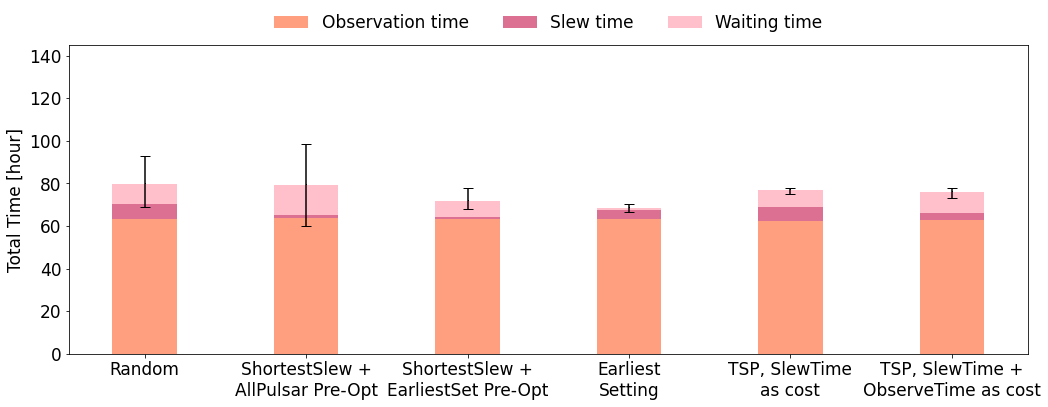

In [458]:
plt.rcParams['figure.figsize'] = (15, 6)
plt.rcParams['font.size'] = 17

slew=[rand_mean[0,2],shortall_mean[0,2], short_mean[0,2], early_mean[0,2], tsp_mean[0,2], tspInt_mean[0,2]]
wait=[rand_mean[0,3],shortall_mean[0,3], short_mean[0,3], early_mean[0,3], tsp_mean[0,3], tspInt_mean[0,3]]
observe=[rand_mean[0,4],shortall_mean[0,4], short_mean[0,4], early_mean[0,4], tsp_mean[0,4], tspInt_mean[0,4]]
plt.bar(range(6),observe,width=0.4,color=(255/255, 159/255, 127/255))
plt.bar(range(6),slew,width=0.4,color='palevioletred',bottom=observe)
plt.bar(range(6),wait,width=0.4,bottom=np.array(observe) + np.array(slew),color='pink')

plt.errorbar(range(6),[y1[0], y2[0], y3[0], y4[0], y5[0], y6[0]], yerr=np.flip(np.array([rand_err[:,0],shortall_err[:,0],short_err[:,0],early_err[:,0],tsp_err[:,0],tspInt_err[:,0]]).T,axis=0), fmt=' k,',capsize=5)

plt.xticks(range(6),['Random', 'ShortestSlew +\nAllPulsar Pre-Opt', 'ShortestSlew +\nEarliestSet Pre-Opt', 'Earliest\nSetting', 'TSP, SlewTime\nas cost','TSP, SlewTime +\nObserveTime as cost'])
plt.ylim(0,145)
plt.ylabel('Total Time [hour]')

plt.legend(frameon=False,ncol=3,loc = 'upper center', bbox_to_anchor=(0.5, 1.15),labels = ['Observation time','Slew time','Waiting time'])#
plt.tight_layout()
plt.savefig(f"results/{dataset}/single_tele.pdf")

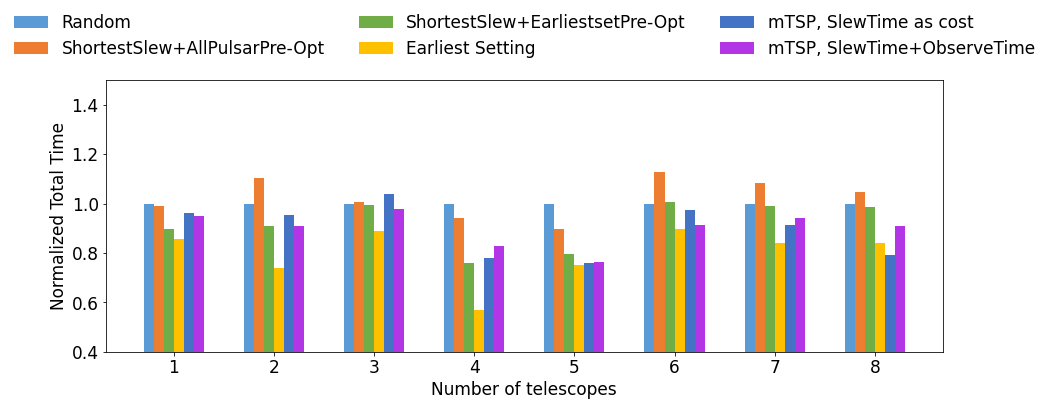

In [459]:
y=np.array([y1,y2,y3,y4,y5,y6])
z = np.zeros([6,8])
#err1=np.zeros([2,8])
#err2=np.zeros([2,8])
#err3=np.zeros([2,8])
#err4=np.zeros([2,8])
#err5=np.zeros([2,8])

for i in range(8):
    for j in range(6):
        z[j,i]=y[j,i]/y[0,i]
    #err1[:,i]=tsp_err[:,i]/min(y[:,i])
    #err2[:,i]=tspInt_err[:,i]/min(y[:,i])
    #err3[:,i]=rand_err[:,i]/min(y[:,i])
    #err4[:,i]=short_err[:,i]/min(y[:,i])
    #err5[:,i]=early_err[:,i]/min(y[:,i])

        

plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.size'] = 17

b1=plt.bar(x1_width,z[0,:],width=0.1,color='#5b9bd5')
b2=plt.bar(x2_width,z[1,:],width=0.1,color='#ed7d31')
b3=plt.bar(x3_width,z[2,:],width=0.1,color='#70ad47')
b4=plt.bar(x4_width,z[3,:],width=0.1,color='#ffc000')
b5=plt.bar(x5_width,z[4,:],width=0.1,color='#4472c4')
b6=plt.bar(x6_width,z[5,:],width=0.1,color='#b235e6')

#plt.errorbar(x1_width,z[0,:],yerr=err1, fmt=' k,',capsize=5)
#plt.errorbar(x2_width,z[1,:],yerr=err2, fmt=' k,',capsize=5)
#plt.errorbar(x3_width,z[2,:],yerr=err3, fmt=' k,',capsize=5)
#plt.errorbar(x4_width,z[3,:],yerr=err4, fmt=' k,',capsize=5)
#plt.errorbar(x5_width,z[4,:],yerr=err5, fmt=' k,',capsize=5)


plt.ylim(0.4,1.5)
#plt.xticks(range(len(x)),x)

plt.xlabel("Number of telescopes")
plt.ylabel("Normalized Total Time")

plt.legend(frameon=False,ncol=3,loc = 'upper center', bbox_to_anchor=(0.5, 1.3), labels = ['Random', 'ShortestSlew+AllPulsarPre-Opt', 'ShortestSlew+EarliestsetPre-Opt', 'Earliest Setting', 'mTSP, SlewTime as cost','mTSP, SlewTime+ObserveTime'])#
plt.savefig(f"results/{dataset}/telenum_bar.pdf")

### Preoptimization policy analysis

In [460]:
policy = 'ShortestSlew4tele'
ShortestSlew_data = np.zeros([10, 3, 16])
ShortestSlew_mean = [1,2]
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    ShortestSlew_data[i,:,:] = data_reader(file_dir,range(5,8))
    
ShortestSlew_mean[0] = np.mean(np.mean(ShortestSlew_data, axis=0), axis=0)

policy = 'ShortestSlew30neig4'
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    ShortestSlew_data[i,:,:] = data_reader(file_dir,range(5,8))
    
ShortestSlew_mean[1] = np.mean(np.mean(ShortestSlew_data, axis=0), axis=0)

2. Random policy

In [461]:
policy = 'Random4tele'
Random_data = np.zeros([10, 3, 16])
Random_mean = [1,2]
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    Random_data[i,:,:] = data_reader(file_dir,range(5,8))
    
Random_mean[0] = np.mean(np.mean(Random_data, axis=0), axis=0)

policy = 'Random30neig4'
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    Random_data[i,:,:] = data_reader(file_dir,range(5,8))
    
Random_mean[1] = np.mean(np.mean(Random_data, axis=0), axis=0)

FileNotFoundError: [Errno 2] File b'results/dataset3/Random30neig4/batch_0_2017_3_21_13_0_0_.csv' does not exist: b'results/dataset3/Random30neig4/batch_0_2017_3_21_13_0_0_.csv'

3. EarliestSetting

In [ ]:
policy = 'EarliestSetting4tele'
EarliestSetting_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    EarliestSetting_data[i,:,:] = data_reader(file_dir,range(5,8))
    
EarliestSetting_mean = np.mean(np.mean(EarliestSetting_data, axis=0),axis=0)

In [ ]:
x_data = ['Random', 'ShortestSlew', 'EarliestSetting']
x2_width = range(0,len(x_data))
x1_width = [i-0.1 for i in x2_width]
x1_width[2] = x2_width[2]
x3_width = [i+0.1 for i in x2_width]

y_1 = [Random_mean[0][1], ShortestSlew_mean[0][1], EarliestSetting_mean[1]]
y_2 = [Random_mean[1][1], ShortestSlew_mean[1][1]]

plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 15

b1=plt.bar(x1_width,y_1,width=0.2,label="all pulsar as neighbour")
b2=plt.bar(x3_width[0:len(x_data)-1],y_2,width=0.2,label="30 earliest setting pulsar as neighbours")

plt.ylim(12,35)
plt.xticks(range(len(x_data)),x_data)


#plt.title("Comparison of preoptimization policy")
plt.xlabel("Policy")
plt.ylabel("Time [hour]")

#plt.bar_label(b1)
#plt.bar_label(b2)
plt.legend(frameon=False,loc = 'lower center', bbox_to_anchor=(0.5, 1.))
plt.tight_layout()
plt.savefig(f"results/{dataset}/preopt.pdf",pad_inches=0.01)

### Policy performance analysis using 4 telescopes test case
#### Data import
1. Simple ShortestSlew policy

In [ ]:
policy = 'ShortestSlew30neig'
ShortestSlew_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    ShortestSlew_data[i,:,:] = data_reader(file_dir,range(5,8))
    
ShortestSlew_mean = np.mean(ShortestSlew_data, axis=0)

2. Random policy

In [ ]:
policy = 'Random30neig'
Random_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    Random_data[i,:,:] = data_reader(file_dir,range(5,8))
    
Random_mean = np.mean(Random_data, axis=0)

3. EarliestSetting

In [ ]:
policy = 'EarliestSetting4tele'
EarliestSetting_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    EarliestSetting_data[i,:,:] = data_reader(file_dir,range(5,8))
    
EarliestSetting_mean = np.mean(EarliestSetting_data, axis=0)

4. MultipleTSP 

In [ ]:
policy = 'tsp4'
tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
tsp_mean = np.mean(tsp_data, axis=0)

#### Total observation duration

In [ ]:
x_data = ['Random', 'ShortestSlew', 'EarliestSetting', 'MultipleTSP']
x2_width = range(0,len(x_data))
x1_width = [i-0.2 for i in x2_width]
x3_width = [i+0.2 for i in x2_width]

y_1 = [Random_mean[0,1], ShortestSlew_mean[0,1], EarliestSetting_mean[0,1], tsp_mean[0,1]]
y_2 = [Random_mean[1,1], ShortestSlew_mean[1,1], EarliestSetting_mean[1,1], tsp_mean[1,1]]
y_3 = [Random_mean[2,1], ShortestSlew_mean[2,1], EarliestSetting_mean[2,1], tsp_mean[2,1]]

b1=plt.bar(x1_width,y_1,width=0.2,label="Telescope 1")
b2=plt.bar(x2_width,y_2,width=0.2,label="Telescope 2")
b3=plt.bar(x3_width,y_3,width=0.2,label="Telescope 3")

plt.xticks(range(len(x_data)),x_data)

plt.title("Total observation duration")
plt.xlabel("Policy")
plt.ylabel("Average Time [hour]")

plt.ylim(16,30)

plt.bar_label(b1)
plt.bar_label(b2)
plt.bar_label(b3)
plt.legend(loc = 'upper right')

# aaaa

#### Simple ShortestSlew policy

In [ ]:
policy = 'ShortestSlew'
ShortestSlew_mean = np.zeros([8, 16])

file_dir = 'results/'+dataset+'/'+ 'ShortestSlew1' + '/' + 'batch_2017_3_21_13_0_0_.csv'
ShortestSlew_mean[0,:] = np.mean(data_reader(file_dir,range(5,15)).astype(np.float), axis=0)
for j in range(2,9):
    ShortestSlew_data = np.zeros([10, j, 16])
    for i in range(10):
        file_dir = 'results/'+dataset+'/'+ policy + str(j) + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
        ShortestSlew_data[i,:,:] = data_reader(file_dir,range(5,5+j))
    ShortestSlew_mean[j-1,:] = np.mean(np.mean(ShortestSlew_data, axis=0), axis=0)

In [ ]:
policy = '10neigShortestSlew'
neig10ShortestSlew_mean = np.zeros([8, 16])

file_dir = 'results/'+dataset+'/'+ '10neigShortestSlew1' + '/' + 'batch_2017_3_21_13_0_0_.csv'
neig10ShortestSlew_mean[0,:] = np.mean(data_reader(file_dir,range(5,15)).astype(np.float), axis=0)
for j in range(2,9):
    ShortestSlew_data = np.zeros([10, j, 16])
    for i in range(10):
        file_dir = 'results/'+dataset+'/'+ policy + str(j) + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
        ShortestSlew_data[i,:,:] = data_reader(file_dir,range(5,5+j))
    neig10ShortestSlew_mean[j-1,:] = np.mean(np.mean(ShortestSlew_data, axis=0), axis=0)

In [ ]:
x = [1,2,3,4,5,6,7,8]
y1 = [1,2,3,4,5,6,7,8]
y2 = [1,2,3,4,5,6,7,8]
for i in range(8):
    y1[i] = ShortestSlew_mean[i,1]
    y2[i] = neig10ShortestSlew_mean[i,1]
    
plt.plot(x,y1)
plt.plot(x,y2)

plt.xlabel('Number of Telescopes')

plt.ylabel('Average Integration time [hour]')

plt.title('Average Integration Time vs. Number of Telescopes, ShortestSlew')

plt.legend(loc = 'best',labels = ['All pulsars as neighbour','10 earliest setting pulsar as neighbour'])

In [ ]:
x = [1,2,3,4,5,6,7,8]
y1 = [1,2,3,4,5,6,7,8]
y2 = [1,2,3,4,5,6,7,8]
for i in range(8):
    y1[i] = ShortestSlew_mean[i,3]
    y2[i] = neig10ShortestSlew_mean[i,3]
    
plt.plot(x,y1)
plt.plot(x,y2)

plt.xlabel('Number of Telescopes')

plt.ylabel('Average waiting time [hour]')

plt.title('Average Waiting Time vs. Number of Telescopes, ShortestSlew')
plt.legend(loc = 'best',labels = ['All pulsars as neighbour','10 earliest setting pulsar as neighbour'])

### Policy performance analysis using 3 telescopes test case
#### Data import
1. Simple ShortestSlew policy

In [ ]:
policy = 'ShortestSlew3'
ShortestSlew_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    ShortestSlew_data[i,:,:] = data_reader(file_dir,range(5,8))
    
ShortestSlew_mean = np.mean(ShortestSlew_data, axis=0)

2. Random policy

In [ ]:
policy = 'Random'
Random_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    Random_data[i,:,:] = data_reader(file_dir,range(5,8))
    
Random_mean = np.mean(Random_data, axis=0)

3. EarliestSetting

In [ ]:
policy = 'EarliestSetting'
EarliestSetting_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    EarliestSetting_data[i,:,:] = data_reader(file_dir,range(5,8))
    
EarliestSetting_mean = np.mean(EarliestSetting_data, axis=0)

4. MultipleTSP 

In [ ]:
policy = 'tsp3'
tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
tsp_mean = np.mean(tsp_data, axis=0)

#### Total observation duration

In [ ]:
x_data = ['Random', 'ShortestSlew', 'EarliestSetting', 'MultipleTSP']
x2_width = range(0,len(x_data))
x1_width = [i-0.2 for i in x2_width]
x3_width = [i+0.2 for i in x2_width]

y_1 = [Random_mean[0,1], ShortestSlew_mean[0,1], EarliestSetting_mean[0,1], tsp_mean[0,1]]
y_2 = [Random_mean[1,1], ShortestSlew_mean[1,1], EarliestSetting_mean[1,1], tsp_mean[1,1]]
y_3 = [Random_mean[2,1], ShortestSlew_mean[2,1], EarliestSetting_mean[2,1], tsp_mean[2,1]]

b1=plt.bar(x1_width,y_1,width=0.2,label="Telescope 1")
b2=plt.bar(x2_width,y_2,width=0.2,label="Telescope 2")
b3=plt.bar(x3_width,y_3,width=0.2,label="Telescope 3")

plt.xticks(range(len(x_data)),x_data)

plt.title("Total observation duration")
plt.xlabel("Policy")
plt.ylabel("Average Time [hour]")

plt.bar_label(b1)
plt.bar_label(b2)
plt.bar_label(b3)
plt.legend(loc = 'lower right')

#### Total slew time

In [ ]:
x_data = ['Random', 'ShortestSlew', 'EarliestSetting', 'MultipleTSP']
x2_width = range(0,len(x_data))
x1_width = [i-0.2 for i in x2_width]
x3_width = [i+0.2 for i in x2_width]

y_1 = [Random_mean[0,2], ShortestSlew_mean[0,2], EarliestSetting_mean[0,2], tsp_mean[0,2]]
y_2 = [Random_mean[1,2], ShortestSlew_mean[1,2], EarliestSetting_mean[1,2], tsp_mean[1,2]]
y_3 = [Random_mean[2,2], ShortestSlew_mean[2,2], EarliestSetting_mean[2,2], tsp_mean[2,2]]

plt.bar(x1_width,y_1,width=0.2,label="Telescope 1")
plt.bar(x2_width,y_2,width=0.2,label="Telescope 2")
plt.bar(x3_width,y_3,width=0.2,label="Telescope 3")

plt.xticks(range(len(x_data)),x_data)

plt.title("Total slew time")
plt.xlabel("Policy")
plt.ylabel("Average Time [hour]")

plt.legend()

#### Total waiting time

In [ ]:
x_data = ['Random', 'ShortestSlew', 'EarliestSetting', 'MultipleTSP']
x2_width = range(0,len(x_data))
x1_width = [i-0.2 for i in x2_width]
x3_width = [i+0.2 for i in x2_width]

y_1 = [Random_mean[0,3], ShortestSlew_mean[0,3], EarliestSetting_mean[0,3], tsp_mean[0,3]]
y_2 = [Random_mean[1,3], ShortestSlew_mean[1,3], EarliestSetting_mean[1,3], tsp_mean[1,3]]
y_3 = [Random_mean[2,3], ShortestSlew_mean[2,3], EarliestSetting_mean[2,3], tsp_mean[2,3]]

plt.bar(x1_width,y_1,width=0.2,label="Telescope 1")
plt.bar(x2_width,y_2,width=0.2,label="Telescope 2")
plt.bar(x3_width,y_3,width=0.2,label="Telescope 3")

plt.xticks(range(len(x_data)),x_data)

plt.title("Total waiting time")
plt.xlabel("Policy")
plt.ylabel("Average Time [hour]")

plt.legend(loc = 'lower right')

### The main influencing factor analysis of observation time
#### ShortestSlew Policy

In [ ]:
telescope_mean = np.mean(ShortestSlew_data, axis = 1)

x_data = [1,2,3,4,5,6,7,8,9,10]
y_total = [1,2,3,4,5,6,7,8,9,10]
y_slew = [1,2,3,4,5,6,7,8,9,10]
y_wait = [1,2,3,4,5,6,7,8,9,10]
y_obs = [1,2,3,4,5,6,7,8,9,10]
for i in range(0,10):
    y_total[i] = telescope_mean[i,1]
    y_slew[i] = telescope_mean[i,2]
    y_wait[i] = telescope_mean[i,3]
    y_obs[i] = telescope_mean[i,4]
    
x0_width = range(0,len(x_data))
x1_width = [i-0.1 for i in x0_width]
x2_width = [i+0.1 for i in x0_width]

plt.bar(x1_width,y_total,width=0.2,label="Total Integration time")
plt.bar(x2_width,y_wait,width=0.2,label="waiting time")

plt.xticks(range(len(x_data)),x_data)

plt.title("relationship between total time and waiting time with shortestslew policy")
plt.xlabel("Test batch")
plt.ylabel("Time [hour]")

plt.legend(loc = 'lower right')

In [ ]:
plt.bar(x1_width,y_total,width=0.2,label="Total Integration time")
plt.bar(x2_width,y_obs,width=0.2,label="Observation time")

plt.xticks(range(len(x_data)),x_data)

plt.title("relationship between total time and Observation time with shortestslew policy")
plt.xlabel("Test batch")
plt.ylabel("Time [hour]")

plt.legend(loc = 'lower right')

#### MultipleTSP Policy

In [ ]:
telescope_mean = np.mean(tsp_data, axis = 1)

x_data = [1,2,3,4,5,6,7,8,9,10]
y_total = [1,2,3,4,5,6,7,8,9,10]
y_slew = [1,2,3,4,5,6,7,8,9,10]
y_wait = [1,2,3,4,5,6,7,8,9,10]
y_obs = [1,2,3,4,5,6,7,8,9,10]
for i in range(0,10):
    y_total[i] = telescope_mean[i,1]
    y_slew[i] = telescope_mean[i,2]
    y_wait[i] = telescope_mean[i,3]
    y_obs[i] = telescope_mean[i,4]
    
x0_width = range(0,len(x_data))
x1_width = [i-0.1 for i in x0_width]
x2_width = [i+0.1 for i in x0_width]

plt.bar(x1_width,y_total,width=0.2,label="Total Integration time")
plt.bar(x2_width,y_wait,width=0.2,label="waiting time")

plt.xticks(range(len(x_data)),x_data)

plt.title("relationship between total time and waiting time with MultipleTSP policy")
plt.xlabel("Test batch")
plt.ylabel("Time [hour]")

plt.legend(loc = 'lower right')

In [ ]:
plt.bar(x1_width,y_total,width=0.2,label="Total Integration time")
plt.bar(x2_width,y_obs,width=0.2,label="Observation time")

plt.xticks(range(len(x_data)),x_data)

plt.title("relationship between total time and Observation time with MultipleTSP policy")
plt.xlabel("Test batch")
plt.ylabel("Time [hour]")

plt.legend(loc = 'lower right')

### Reschedule step test
Parameters: \
1-8 step: 30 neighbours each time; Multiple tsp polucy; 3 telescopes

In [ ]:
policy = '1steptsp3'
step1tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step1tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step1tsp_mean = np.mean(np.mean(step1tsp_data, axis=0), axis=0)

policy = '2steptsp3'
step2tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step2tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step2tsp_mean = np.mean(np.mean(step2tsp_data, axis=0), axis=0)

policy = '3steptsp3'
step3tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step3tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step3tsp_mean = np.mean(np.mean(step3tsp_data, axis=0), axis=0)

policy = '4steptsp3'
step4tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step4tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step4tsp_mean = np.mean(np.mean(step4tsp_data, axis=0), axis=0)

policy = '5steptsp3'
step5tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step5tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step5tsp_mean = np.mean(np.mean(step5tsp_data, axis=0), axis=0)

policy = '6steptsp3'
step6tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step6tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step6tsp_mean = np.mean(np.mean(step6tsp_data, axis=0), axis=0)

policy = '7steptsp3'
step7tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step7tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step7tsp_mean = np.mean(np.mean(step7tsp_data, axis=0), axis=0)

policy = '8steptsp3'
step8tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step8tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step8tsp_mean = np.mean(np.mean(step8tsp_data, axis=0), axis=0)

x = [1,2,3,4,5,6,7,8]
y = [step1tsp_mean[1], step2tsp_mean[1], step3tsp_mean[1], step4tsp_mean[1], step5tsp_mean[1], step6tsp_mean[1], step7tsp_mean[1], step8tsp_mean[1]]

print((max(y)-min(y))/min(y))

plt.rcParams['figure.figsize'] = (6, 3)

plt.plot(x,y,marker='o')

plt.xlabel('Reschedule step')
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(1))
#plt.ylabel('Average Integration time [hour]')

plt.ylabel('Time [hour]')

#plt.title('Average Integration Time vs. Reschedule Step, 3 telescopes setup')
plt.tight_layout()
plt.savefig(f"results/{dataset}/3reschedule_step.pdf")

In [ ]:
policy = '1steptsp4'
step1tsp_data = np.zeros([10, 4, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step1tsp_data[i,:,:] = data_reader(file_dir,range(5,9))
    
step1tsp_mean = np.mean(np.mean(step1tsp_data, axis=0), axis=0)

policy = '2steptsp4'
step2tsp_data = np.zeros([10, 4, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step2tsp_data[i,:,:] = data_reader(file_dir,range(5,9))
    
step2tsp_mean = np.mean(np.mean(step2tsp_data, axis=0), axis=0)

policy = '3steptsp4'
step3tsp_data = np.zeros([10, 4, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step3tsp_data[i,:,:] = data_reader(file_dir,range(5,9))
    
step3tsp_mean = np.mean(np.mean(step3tsp_data, axis=0), axis=0)

policy = '4steptsp4'
step4tsp_data = np.zeros([10, 4, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step4tsp_data[i,:,:] = data_reader(file_dir,range(5,9))
    
step4tsp_mean = np.mean(np.mean(step4tsp_data, axis=0), axis=0)

policy = '5steptsp4'
step5tsp_data = np.zeros([10, 4, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step5tsp_data[i,:,:] = data_reader(file_dir,range(5,9))
    
step5tsp_mean = np.mean(np.mean(step5tsp_data, axis=0), axis=0)

policy = '6steptsp4'
step6tsp_data = np.zeros([10, 4, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step6tsp_data[i,:,:] = data_reader(file_dir,range(5,9))
    
step6tsp_mean = np.mean(np.mean(step6tsp_data, axis=0), axis=0)

policy = '7steptsp4'
step7tsp_data = np.zeros([10, 4, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step7tsp_data[i,:,:] = data_reader(file_dir,range(5,9))
    
step7tsp_mean = np.mean(np.mean(step7tsp_data, axis=0), axis=0)

policy = '8steptsp4'
step8tsp_data = np.zeros([10, 4, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step8tsp_data[i,:,:] = data_reader(file_dir,range(5,9))
    
step8tsp_mean = np.mean(np.mean(step8tsp_data, axis=0), axis=0)

x = [1,2,3,4,5,6,7,8]
y = [step1tsp_mean[1], step2tsp_mean[1], step3tsp_mean[1], step4tsp_mean[1], step5tsp_mean[1], step6tsp_mean[1], step7tsp_mean[1], step8tsp_mean[1]]

print((max(y)-min(y))/min(y))

plt.rcParams['figure.figsize'] = (6, 3)

plt.plot(x,y,marker='o')

plt.xlabel('Reschedule step')
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(1))
#plt.ylabel('Average Integration time [hour]')

plt.ylabel('Time [hour]')

#plt.title('Average Integration Time vs. Reschedule Step, 3 telescopes setup')
plt.tight_layout()
plt.savefig(f"results/{dataset}/4reschedule_step.pdf")

In [ ]:
policy = '1steptsp5'
step1tsp_data = np.zeros([10, 5, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step1tsp_data[i,:,:] = data_reader(file_dir,range(5,10))
    
step1tsp_mean = np.mean(np.mean(step1tsp_data, axis=0), axis=0)

policy = '2steptsp5'
step2tsp_data = np.zeros([10, 5, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step2tsp_data[i,:,:] = data_reader(file_dir,range(5,10))
    
step2tsp_mean = np.mean(np.mean(step2tsp_data, axis=0), axis=0)

policy = '3steptsp5'
step3tsp_data = np.zeros([10, 5, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step3tsp_data[i,:,:] = data_reader(file_dir,range(5,10))
    
step3tsp_mean = np.mean(np.mean(step3tsp_data, axis=0), axis=0)

policy = '4steptsp5'
step4tsp_data = np.zeros([10, 5, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step4tsp_data[i,:,:] = data_reader(file_dir,range(5,10))
    
step4tsp_mean = np.mean(np.mean(step4tsp_data, axis=0), axis=0)

policy = '5steptsp5'
step5tsp_data = np.zeros([10, 5, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step5tsp_data[i,:,:] = data_reader(file_dir,range(5,10))
    
step5tsp_mean = np.mean(np.mean(step5tsp_data, axis=0), axis=0)

policy = '6steptsp5'
step6tsp_data = np.zeros([10, 5, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step6tsp_data[i,:,:] = data_reader(file_dir,range(5,10))
    
step6tsp_mean = np.mean(np.mean(step6tsp_data, axis=0), axis=0)

policy = '7steptsp5'
step7tsp_data = np.zeros([10, 5, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step7tsp_data[i,:,:] = data_reader(file_dir,range(5,10))
    
step7tsp_mean = np.mean(np.mean(step7tsp_data, axis=0), axis=0)

policy = '8steptsp5'
step8tsp_data = np.zeros([10, 5, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step8tsp_data[i,:,:] = data_reader(file_dir,range(5,10))
    
step8tsp_mean = np.mean(np.mean(step8tsp_data, axis=0), axis=0)

x = [1,2,3,4,5,6,7,8]
y = [step1tsp_mean[1], step2tsp_mean[1], step3tsp_mean[1], step4tsp_mean[1], step5tsp_mean[1], step6tsp_mean[1], step7tsp_mean[1], step8tsp_mean[1]]

print((max(y)-min(y))/min(y))

plt.rcParams['figure.figsize'] = (6, 3)

plt.plot(x,y,marker='o')

plt.xlabel('Reschedule step')
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(1))
#plt.ylabel('Average Integration time [hour]')

plt.ylabel('Time [hour]')

#plt.title('Average Integration Time vs. Reschedule Step, 3 telescopes setup')
plt.tight_layout()
plt.savefig(f"results/{dataset}/5reschedule_step.pdf")

In [ ]:
policy = '1steptsp6'
step1tsp_data = np.zeros([10, 6, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step1tsp_data[i,:,:] = data_reader(file_dir,range(5,11))
    
step1tsp_mean = np.mean(np.mean(step1tsp_data, axis=0), axis=0)

policy = '2steptsp6'
step2tsp_data = np.zeros([10, 6, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step2tsp_data[i,:,:] = data_reader(file_dir,range(5,11))
    
step2tsp_mean = np.mean(np.mean(step2tsp_data, axis=0), axis=0)

policy = '3steptsp6'
step3tsp_data = np.zeros([10, 6, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step3tsp_data[i,:,:] = data_reader(file_dir,range(5,11))
    
step3tsp_mean = np.mean(np.mean(step3tsp_data, axis=0), axis=0)

policy = '4steptsp6'
step4tsp_data = np.zeros([10, 6, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step4tsp_data[i,:,:] = data_reader(file_dir,range(5,11))
    
step4tsp_mean = np.mean(np.mean(step4tsp_data, axis=0), axis=0)

policy = '5steptsp6'
step5tsp_data = np.zeros([10, 6, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step5tsp_data[i,:,:] = data_reader(file_dir,range(5,11))
    
step5tsp_mean = np.mean(np.mean(step5tsp_data, axis=0), axis=0)

policy = '6steptsp6'
step6tsp_data = np.zeros([10, 6, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step6tsp_data[i,:,:] = data_reader(file_dir,range(5,11))
    
step6tsp_mean = np.mean(np.mean(step6tsp_data, axis=0), axis=0)

policy = '7steptsp6'
step7tsp_data = np.zeros([10, 6, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step7tsp_data[i,:,:] = data_reader(file_dir,range(5,11))
    
step7tsp_mean = np.mean(np.mean(step7tsp_data, axis=0), axis=0)

policy = '8steptsp6'
step8tsp_data = np.zeros([10, 6, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step8tsp_data[i,:,:] = data_reader(file_dir,range(5,11))
    
step8tsp_mean = np.mean(np.mean(step8tsp_data, axis=0), axis=0)

x = [1,2,3,4,5,6,7,8]
y = [step1tsp_mean[1], step2tsp_mean[1], step3tsp_mean[1], step4tsp_mean[1], step5tsp_mean[1], step6tsp_mean[1], step7tsp_mean[1], step8tsp_mean[1]]

print((max(y)-min(y))/min(y))

plt.rcParams['figure.figsize'] = (6, 3)

plt.plot(x,y,marker='o')

plt.xlabel('Reschedule step')

#plt.ylabel('Average Integration time [hour]')
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(1))

plt.ylabel('Time [hour]')

#plt.title('Average Integration Time vs. Reschedule Step, 3 telescopes setup')
plt.tight_layout()
plt.savefig(f"results/{dataset}/6reschedule_step.pdf")

In [ ]:
policy = '1steptsp2'
step1tsp_data = np.zeros([10, 2, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step1tsp_data[i,:,:] = data_reader(file_dir,range(5,7))
    
step1tsp_mean = np.mean(np.mean(step1tsp_data, axis=0), axis=0)

policy = '2steptsp2'
step2tsp_data = np.zeros([10, 2, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step2tsp_data[i,:,:] = data_reader(file_dir,range(5,7))
    
step2tsp_mean = np.mean(np.mean(step2tsp_data, axis=0), axis=0)

policy = '3steptsp2'
step3tsp_data = np.zeros([10, 2, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step3tsp_data[i,:,:] = data_reader(file_dir,range(5,7))
    
step3tsp_mean = np.mean(np.mean(step3tsp_data, axis=0), axis=0)

policy = '4steptsp2'
step4tsp_data = np.zeros([10, 2, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step4tsp_data[i,:,:] = data_reader(file_dir,range(5,7))
    
step4tsp_mean = np.mean(np.mean(step4tsp_data, axis=0), axis=0)

policy = '5steptsp2'
step5tsp_data = np.zeros([10, 2, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step5tsp_data[i,:,:] = data_reader(file_dir,range(5,7))
    
step5tsp_mean = np.mean(np.mean(step5tsp_data, axis=0), axis=0)

policy = '6steptsp2'
step6tsp_data = np.zeros([10, 2, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step6tsp_data[i,:,:] = data_reader(file_dir,range(5,7))
    
step6tsp_mean = np.mean(np.mean(step6tsp_data, axis=0), axis=0)

policy = '7steptsp2'
step7tsp_data = np.zeros([10, 2, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step7tsp_data[i,:,:] = data_reader(file_dir,range(5,7))
    
step7tsp_mean = np.mean(np.mean(step7tsp_data, axis=0), axis=0)

policy = '8steptsp2'
step8tsp_data = np.zeros([10, 2, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step8tsp_data[i,:,:] = data_reader(file_dir,range(5,7))
    
step8tsp_mean = np.mean(np.mean(step8tsp_data, axis=0), axis=0)

x = [1,2,3,4,5,6,7,8]
y = [step1tsp_mean[1], step2tsp_mean[1], step3tsp_mean[1], step4tsp_mean[1], step5tsp_mean[1], step6tsp_mean[1], step7tsp_mean[1], step8tsp_mean[1]]

print((max(y)-min(y))/min(y))

plt.rcParams['figure.figsize'] = (6, 3)
plt.rcParams['font.size'] = 15

plt.plot(x,y,marker='o')

plt.xlabel('Reschedule step')
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(1))
#plt.ylabel('Average Integration time [hour]')

plt.ylabel('Time [hour]')

#plt.title('Average Integration Time vs. Reschedule Step, 3 telescopes setup')

plt.tight_layout()

plt.savefig(f"results/{dataset}/2reschedule_step.pdf")

### Reschedule step test
Parameters: \
1-8 step: 30 neighbours each time; Multiple tsp polucy; 3 telescopes

In [ ]:
policy = '1steptsp2'
step1tsp_data = np.zeros([10, 2, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step1tsp_data[i,:,:] = data_reader(file_dir,range(5,7))
    
step1tsp_mean = np.mean(np.mean(step1tsp_data, axis=0), axis=0)

policy = '2steptsp2'
step2tsp_data = np.zeros([10, 2, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step2tsp_data[i,:,:] = data_reader(file_dir,range(5,7))
    
step2tsp_mean = np.mean(np.mean(step2tsp_data, axis=0), axis=0)

policy = '3steptsp2'
step3tsp_data = np.zeros([10, 2, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step3tsp_data[i,:,:] = data_reader(file_dir,range(5,7))
    
step3tsp_mean = np.mean(np.mean(step3tsp_data, axis=0), axis=0)

policy = '4steptsp2'
step4tsp_data = np.zeros([10, 2, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step4tsp_data[i,:,:] = data_reader(file_dir,range(5,7))
    
step4tsp_mean = np.mean(np.mean(step4tsp_data, axis=0), axis=0)

policy = '5steptsp2'
step5tsp_data = np.zeros([10, 2, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step5tsp_data[i,:,:] = data_reader(file_dir,range(5,7))
    
step5tsp_mean = np.mean(np.mean(step5tsp_data, axis=0), axis=0)

policy = '6steptsp2'
step6tsp_data = np.zeros([10, 2, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step6tsp_data[i,:,:] = data_reader(file_dir,range(5,7))
    
step6tsp_mean = np.mean(np.mean(step6tsp_data, axis=0), axis=0)

policy = '7steptsp2'
step7tsp_data = np.zeros([10, 2, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step7tsp_data[i,:,:] = data_reader(file_dir,range(5,7))
    
step7tsp_mean = np.mean(np.mean(step7tsp_data, axis=0), axis=0)

policy = '8steptsp2'
step8tsp_data = np.zeros([10, 2, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step8tsp_data[i,:,:] = data_reader(file_dir,range(5,7))
    
step8tsp_mean = np.mean(np.mean(step8tsp_data, axis=0), axis=0)

x = [1,2,3,4,5,6,7,8]
y = [step1tsp_mean[1], step2tsp_mean[1], step3tsp_mean[1], step4tsp_mean[1], step5tsp_mean[1], step6tsp_mean[1], step7tsp_mean[1], step8tsp_mean[1]]

print((max(y)-min(y))/min(y))

plt.rcParams['figure.figsize'] = (6, 3)
plt.rcParams['font.size'] = 15

plt.plot(x,y,marker='o')

plt.xlabel('Reschedule step')
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(1))
#plt.ylabel('Average Integration time [hour]')

plt.ylabel('Time [hour]')

#plt.title('Average Integration Time vs. Reschedule Step, 3 telescopes setup')

plt.tight_layout()

plt.savefig(f"results/{dataset}/2reschedule_step.pdf")

In [ ]:
policy = '1steptsp3'
step1tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step1tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step1tsp_mean = np.mean(np.mean(step1tsp_data, axis=0), axis=0)

policy = '2steptsp3'
step2tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step2tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step2tsp_mean = np.mean(np.mean(step2tsp_data, axis=0), axis=0)

policy = '3steptsp3'
step3tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step3tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step3tsp_mean = np.mean(np.mean(step3tsp_data, axis=0), axis=0)

policy = '4steptsp3'
step4tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step4tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step4tsp_mean = np.mean(np.mean(step4tsp_data, axis=0), axis=0)

policy = '5steptsp3'
step5tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step5tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step5tsp_mean = np.mean(np.mean(step5tsp_data, axis=0), axis=0)

policy = '6steptsp3'
step6tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step6tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step6tsp_mean = np.mean(np.mean(step6tsp_data, axis=0), axis=0)

policy = '7steptsp3'
step7tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step7tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step7tsp_mean = np.mean(np.mean(step7tsp_data, axis=0), axis=0)

policy = '8steptsp3'
step8tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step8tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step8tsp_mean = np.mean(np.mean(step8tsp_data, axis=0), axis=0)

x = [1,2,3,4,5,6,7,8]
y = [step1tsp_mean[1], step2tsp_mean[1], step3tsp_mean[1], step4tsp_mean[1], step5tsp_mean[1], step6tsp_mean[1], step7tsp_mean[1], step8tsp_mean[1]]

print((max(y)-min(y))/min(y))

plt.rcParams['figure.figsize'] = (6, 3)

plt.plot(x,y,marker='o')

plt.xlabel('Reschedule step')
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(1))
#plt.ylabel('Average Integration time [hour]')

plt.ylabel('Time [hour]')

#plt.title('Average Integration Time vs. Reschedule Step, 3 telescopes setup')
plt.tight_layout()
plt.savefig(f"results/{dataset}/3reschedule_step.pdf")

In [ ]:
policy = '1steptsp4'
step1tsp_data = np.zeros([10, 4, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step1tsp_data[i,:,:] = data_reader(file_dir,range(5,9))
    
step1tsp_mean = np.mean(np.mean(step1tsp_data, axis=0), axis=0)

policy = '2steptsp4'
step2tsp_data = np.zeros([10, 4, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step2tsp_data[i,:,:] = data_reader(file_dir,range(5,9))
    
step2tsp_mean = np.mean(np.mean(step2tsp_data, axis=0), axis=0)

policy = '3steptsp4'
step3tsp_data = np.zeros([10, 4, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step3tsp_data[i,:,:] = data_reader(file_dir,range(5,9))
    
step3tsp_mean = np.mean(np.mean(step3tsp_data, axis=0), axis=0)

policy = '4steptsp4'
step4tsp_data = np.zeros([10, 4, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step4tsp_data[i,:,:] = data_reader(file_dir,range(5,9))
    
step4tsp_mean = np.mean(np.mean(step4tsp_data, axis=0), axis=0)

policy = '5steptsp4'
step5tsp_data = np.zeros([10, 4, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step5tsp_data[i,:,:] = data_reader(file_dir,range(5,9))
    
step5tsp_mean = np.mean(np.mean(step5tsp_data, axis=0), axis=0)

policy = '6steptsp4'
step6tsp_data = np.zeros([10, 4, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step6tsp_data[i,:,:] = data_reader(file_dir,range(5,9))
    
step6tsp_mean = np.mean(np.mean(step6tsp_data, axis=0), axis=0)

policy = '7steptsp4'
step7tsp_data = np.zeros([10, 4, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step7tsp_data[i,:,:] = data_reader(file_dir,range(5,9))
    
step7tsp_mean = np.mean(np.mean(step7tsp_data, axis=0), axis=0)

policy = '8steptsp4'
step8tsp_data = np.zeros([10, 4, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step8tsp_data[i,:,:] = data_reader(file_dir,range(5,9))
    
step8tsp_mean = np.mean(np.mean(step8tsp_data, axis=0), axis=0)

x = [1,2,3,4,5,6,7,8]
y = [step1tsp_mean[1], step2tsp_mean[1], step3tsp_mean[1], step4tsp_mean[1], step5tsp_mean[1], step6tsp_mean[1], step7tsp_mean[1], step8tsp_mean[1]]

print((max(y)-min(y))/min(y))

plt.rcParams['figure.figsize'] = (6, 3)

plt.plot(x,y,marker='o')

plt.xlabel('Reschedule step')
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(1))
#plt.ylabel('Average Integration time [hour]')

plt.ylabel('Time [hour]')

#plt.title('Average Integration Time vs. Reschedule Step, 3 telescopes setup')
plt.tight_layout()
plt.savefig(f"results/{dataset}/4reschedule_step.pdf")

In [ ]:
policy = '1steptsp5'
step1tsp_data = np.zeros([10, 5, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step1tsp_data[i,:,:] = data_reader(file_dir,range(5,10))
    
step1tsp_mean = np.mean(np.mean(step1tsp_data, axis=0), axis=0)

policy = '2steptsp5'
step2tsp_data = np.zeros([10, 5, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step2tsp_data[i,:,:] = data_reader(file_dir,range(5,10))
    
step2tsp_mean = np.mean(np.mean(step2tsp_data, axis=0), axis=0)

policy = '3steptsp5'
step3tsp_data = np.zeros([10, 5, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step3tsp_data[i,:,:] = data_reader(file_dir,range(5,10))
    
step3tsp_mean = np.mean(np.mean(step3tsp_data, axis=0), axis=0)

policy = '4steptsp5'
step4tsp_data = np.zeros([10, 5, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step4tsp_data[i,:,:] = data_reader(file_dir,range(5,10))
    
step4tsp_mean = np.mean(np.mean(step4tsp_data, axis=0), axis=0)

policy = '5steptsp5'
step5tsp_data = np.zeros([10, 5, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step5tsp_data[i,:,:] = data_reader(file_dir,range(5,10))
    
step5tsp_mean = np.mean(np.mean(step5tsp_data, axis=0), axis=0)

policy = '6steptsp5'
step6tsp_data = np.zeros([10, 5, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step6tsp_data[i,:,:] = data_reader(file_dir,range(5,10))
    
step6tsp_mean = np.mean(np.mean(step6tsp_data, axis=0), axis=0)

policy = '7steptsp5'
step7tsp_data = np.zeros([10, 5, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step7tsp_data[i,:,:] = data_reader(file_dir,range(5,10))
    
step7tsp_mean = np.mean(np.mean(step7tsp_data, axis=0), axis=0)

policy = '8steptsp5'
step8tsp_data = np.zeros([10, 5, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step8tsp_data[i,:,:] = data_reader(file_dir,range(5,10))
    
step8tsp_mean = np.mean(np.mean(step8tsp_data, axis=0), axis=0)

x = [1,2,3,4,5,6,7,8]
y = [step1tsp_mean[1], step2tsp_mean[1], step3tsp_mean[1], step4tsp_mean[1], step5tsp_mean[1], step6tsp_mean[1], step7tsp_mean[1], step8tsp_mean[1]]

print((max(y)-min(y))/min(y))

plt.rcParams['figure.figsize'] = (6, 3)

plt.plot(x,y,marker='o')

plt.xlabel('Reschedule step')
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(1))
#plt.ylabel('Average Integration time [hour]')

plt.ylabel('Time [hour]')

#plt.title('Average Integration Time vs. Reschedule Step, 3 telescopes setup')
plt.tight_layout()
plt.savefig(f"results/{dataset}/5reschedule_step.pdf")

In [ ]:
policy = '1steptsp6'
step1tsp_data = np.zeros([10, 6, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step1tsp_data[i,:,:] = data_reader(file_dir,range(5,11))
    
step1tsp_mean = np.mean(np.mean(step1tsp_data, axis=0), axis=0)

policy = '2steptsp6'
step2tsp_data = np.zeros([10, 6, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step2tsp_data[i,:,:] = data_reader(file_dir,range(5,11))
    
step2tsp_mean = np.mean(np.mean(step2tsp_data, axis=0), axis=0)

policy = '3steptsp6'
step3tsp_data = np.zeros([10, 6, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step3tsp_data[i,:,:] = data_reader(file_dir,range(5,11))
    
step3tsp_mean = np.mean(np.mean(step3tsp_data, axis=0), axis=0)

policy = '4steptsp6'
step4tsp_data = np.zeros([10, 6, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step4tsp_data[i,:,:] = data_reader(file_dir,range(5,11))
    
step4tsp_mean = np.mean(np.mean(step4tsp_data, axis=0), axis=0)

policy = '5steptsp6'
step5tsp_data = np.zeros([10, 6, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step5tsp_data[i,:,:] = data_reader(file_dir,range(5,11))
    
step5tsp_mean = np.mean(np.mean(step5tsp_data, axis=0), axis=0)

policy = '6steptsp6'
step6tsp_data = np.zeros([10, 6, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step6tsp_data[i,:,:] = data_reader(file_dir,range(5,11))
    
step6tsp_mean = np.mean(np.mean(step6tsp_data, axis=0), axis=0)

policy = '7steptsp6'
step7tsp_data = np.zeros([10, 6, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step7tsp_data[i,:,:] = data_reader(file_dir,range(5,11))
    
step7tsp_mean = np.mean(np.mean(step7tsp_data, axis=0), axis=0)

policy = '8steptsp6'
step8tsp_data = np.zeros([10, 6, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step8tsp_data[i,:,:] = data_reader(file_dir,range(5,11))
    
step8tsp_mean = np.mean(np.mean(step8tsp_data, axis=0), axis=0)

x = [1,2,3,4,5,6,7,8]
y = [step1tsp_mean[1], step2tsp_mean[1], step3tsp_mean[1], step4tsp_mean[1], step5tsp_mean[1], step6tsp_mean[1], step7tsp_mean[1], step8tsp_mean[1]]

print((max(y)-min(y))/min(y))

plt.rcParams['figure.figsize'] = (6, 3)

plt.plot(x,y,marker='o')

plt.xlabel('Reschedule step')
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(1))
#plt.ylabel('Average Integration time [hour]')

plt.ylabel('Time [hour]')

#plt.title('Average Integration Time vs. Reschedule Step, 3 telescopes setup')
plt.tight_layout()
plt.savefig(f"results/{dataset}/6reschedule_step.pdf")